# Imports

In [7]:
!pip install -r requirements.txt

  Using cached matplotlib-3.4.3.tar.gz (37.9 MB)
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [35 lines of output]
      /private/var/folders/8f/6znkn6r55qj5dgt5vxxlvwjm0000gn/T/pip-install-valkjik0/matplotlib_106d2b7799024b56807d77e4337d153e/setup.py:34: SetuptoolsDeprecationWarning: The test command is disabled and references to it are deprecated.
      !!
      
              ********************************************************************************
              Please remove any references to `setuptools.command.test` in all supported versions of the affected package.
      
              This deprecation is overdue, please update your project and remove deprecated
              calls to avoid build errors in the future.
              ********************************************************************************
      
      !!
        from setuptools.command

In [16]:
# Data imports
import pandas as pd
import numpy as np
import math

# Visualization imports
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
plt.rcParams['figure.figsize'] = [8, 4]


# ML Imports
from sklearn.model_selection import train_test_split, KFold, cross_validate, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score
import missingno as msno
from sklearn.impute import KNNImputer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,mutual_info_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import shap

from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay, confusion_matrix
import pickle

/opt/miniconda3/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [17]:
import warnings
warnings.filterwarnings("ignore")

Main things:
* EDA
* Interpretation

In [18]:
df = pd.read_csv('hotel_bookings.csv')

In [19]:
pd.set_option('display.max_columns',None)

# Data Overview

We will first explore the basic information of the dataset, analyse missing values and outliers. We will also explore the nature of some variables, dropping them if they are highly correlated with the dependent variable. We will also do some feature engineering and feature extraction. 

After that We will do further EDA and analyse distribution and visualize the data. 

Next, we will build several Machine Learning models, experiment with hyperparameters, evaluate them and interpret them.

Next, we will choose the best model and interpret the model better and understand how it works. 

Finally, We will test the model on a validation set and export the pipeline and the model.

## Basic Data Overview and Information

> This data article describes two datasets with hotel demand data. One of the hotels (H1) is a resort hotel and the other is a city hotel (H2). Both datasets share the same structure, with 31 variables describing the 40,060 observations of H1 and 79,330 observations of H2. Each observation represents a hotel booking. Both datasets comprehend bookings due to arrive between the 1st of July of 2015 and the 31st of August 2017, including bookings that effectively arrived and bookings that were canceled. 

### Data Dictionary

|variable                        |class       |description                                                                                      |
|:-------------------------------|:-----------|:------------------------------------------------------------------------------------------------|
|adr                             |numeric     |Average daily rate                                                                               |
|adults                          |integer     |Number of adults                                                                                 |
|agent                           |categorical |The id of the travel agency                                                                      |
|arrival_date_day_of_month       |integer     |Day of the month of the arrival date                                                             |
|arrival_date_month              |categorical |Month of arrival date with 12 categories: “January” to “December”                                |
|arrival_date_week_number        |integer     |Week number of the arrival date                                                                  |
|arrival_date_year               |integer     |Year of arrival date                                                                             |
|assigned_room_type              |categorical |The code for type of room assigned                                                               |
|babies                          |integer     |Number of babies                                                                                 |
|booking_changes                 |integer     |The number of changes made to the booking                                                        |
|children                        |integer     |Number of children                                                                               |
|company                         |categorical |The id of the company making the booking                                                         |
|country                         |categorical |The country of originin ISO 3155-3:2013 format                                                   |
|customer_type                   |categorical |The type of booking: Contract / Group / Transient / Transient-Party                              |
|days_in_waiting_list            |integer     |The number of days the booking was in the waiting list                                           |
|deposit_type                    |categorical |The type of deposit: No Deposit / Non Refund / Refundable                                        |
|distribution_channel            |categorical |The booking distribution channel: TA / TO etc.                                                   |
|is_cancelled                    |categorical |A boolean indicating if the booking was cancelled (1) or not (0)                                 |
|is_repeated_guest               |categorical |A boolean indicating if it was a repeated guest (1) or not (0)                                   |
|lead_time                       |integer     |The number of days between the booking date and arrival date                                     |
|market_segment                  |categorical |A designation for the market segment: TA. TO                                                     |
|meal                            |categorical |The type of meal booked: Bed & Breakfast (BB), Half Board (HB), and Full Board (FB)              |
|previous_bookings_not_cancelled |integer     |The number of previous bookings not cancelled by the customer prior to the current booking       |
|previous_cancellations          |integer     |The number of previous bookings that were cancelled by the customer prior to the current booking |
|required_car_parking_spaces     |integer     |The number of car parking spaces required by the customer                                        |
|reservation_status              |categorical |The last status of the reservation: Canceled / Check-Out / No-Show                               |
|reservation_status_date         |date        |The date at which the last status was set.                                                       |
|reserved_room_type              |categorical |The code of room type reserved.                                                                  |
|stays_in_weekend_nights         |integer     |The number of weekend nights stayed or booked to stay                                            |
|stays_in_week_nights            |integer     |The number of week nights stayed or booked to stay                                               |
|total_of_special_requests       |integer     |The number of special requests made by the customer                                              |

In [20]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


### Basic Information

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [22]:
df.isna().sum()[df.isna().sum() > 0]

children         4
country        488
agent        16340
company     112593
dtype: int64

<Axes: >

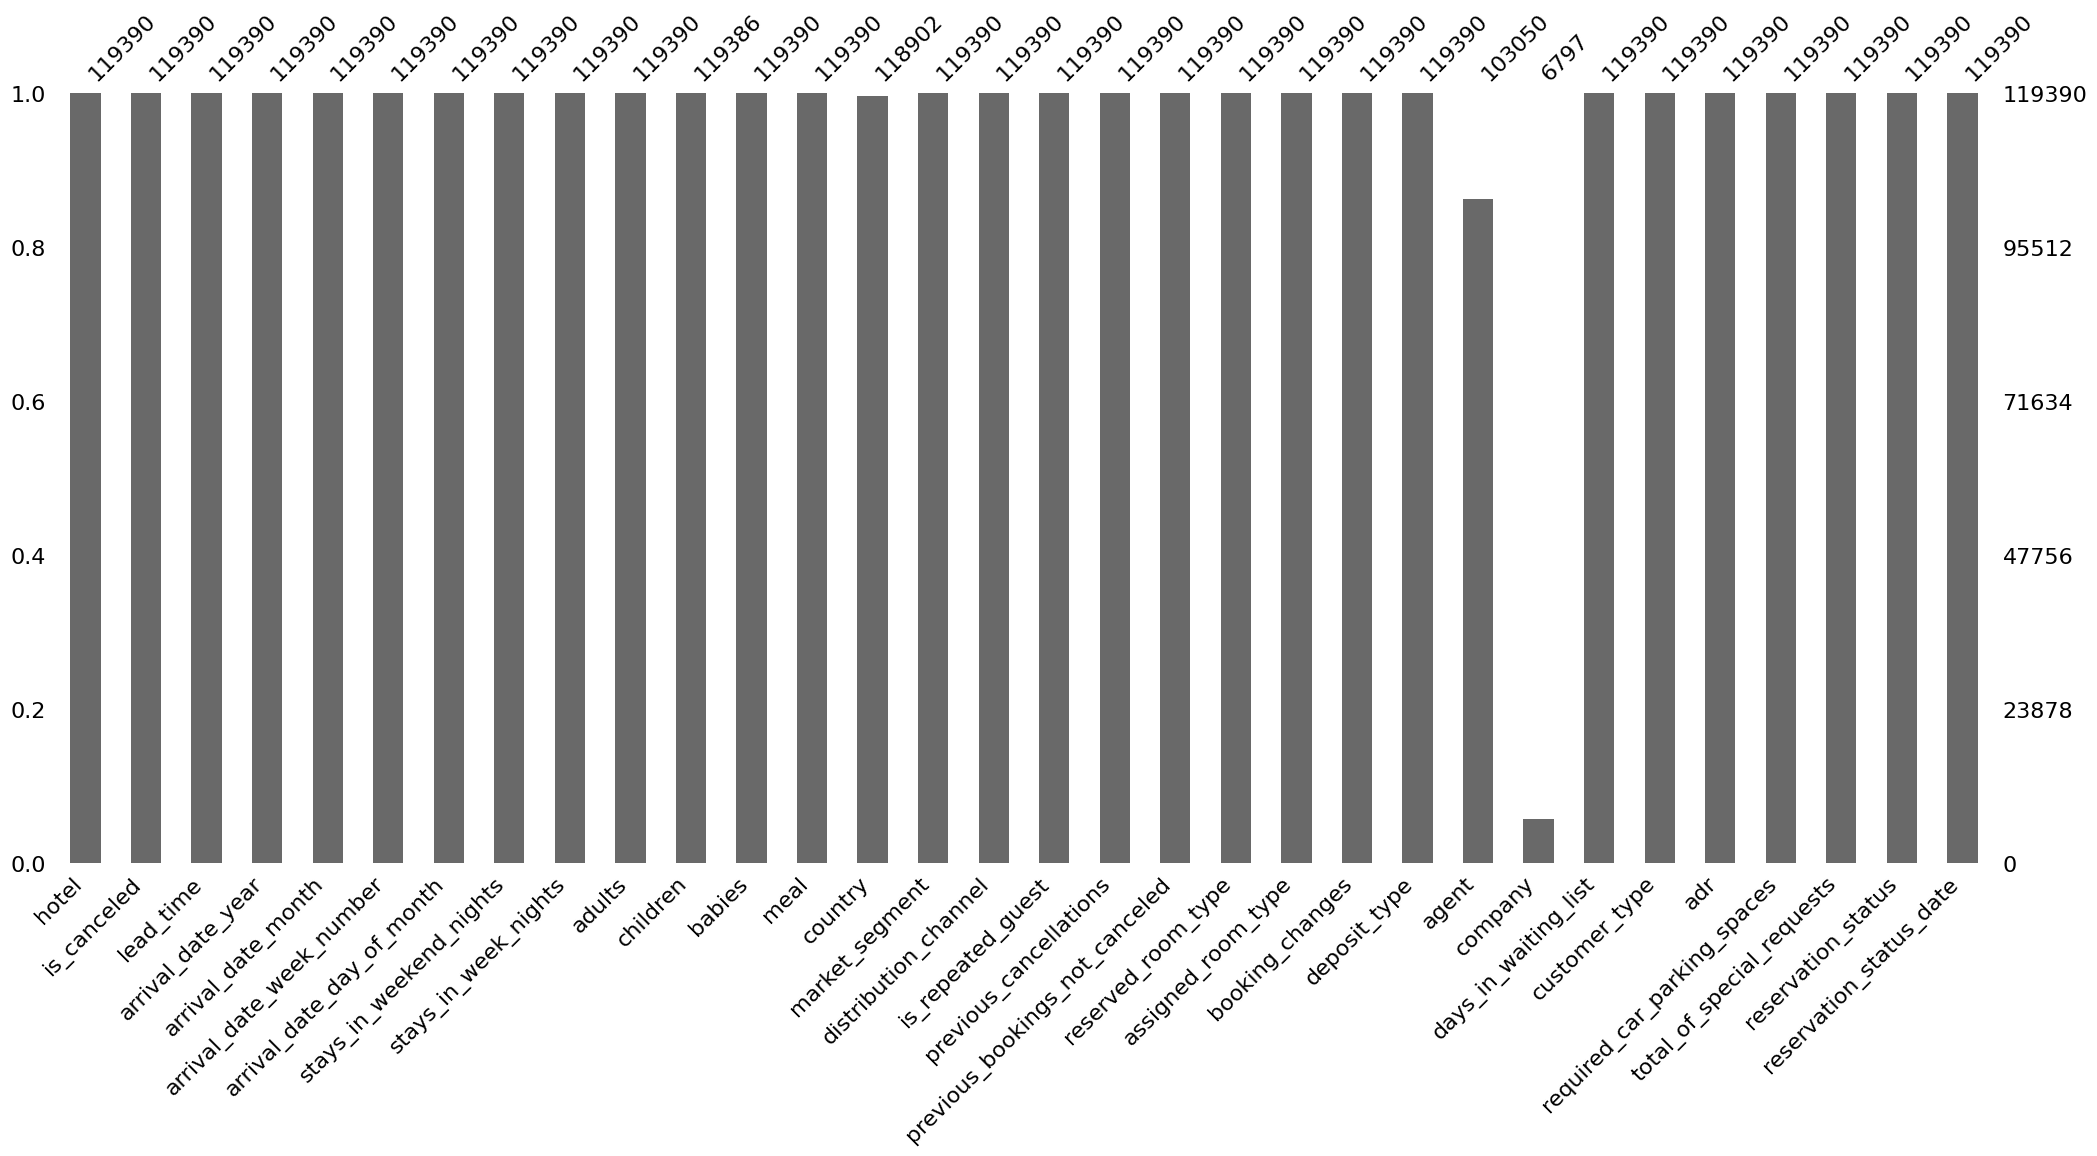

In [23]:
msno.bar(df)

**Dataset Overview**

The dataset consists of **119,390 entries** with **32 columns**. Here's the breakdown of the data types:

- **Object** data type columns: 12
- **Int64** data type columns: 16
- **Float64** data type columns: 4

**Missing Values**

The dataset contains missing values in four columns:

- **children:** 4 missing values
- **country:** 488 missing values
- **agent:** 16,340 missing values
- **company:** 112,593 missing values

These missing values might need addressing.

### Missing Values

In [24]:
duplicate_rows = df[df.duplicated()]
print("Number of duplicate data: ", len(duplicate_rows))
print("Percent of duplicate data: ", len(duplicate_rows)/len(df))

Number of duplicate data:  31994
Percent of duplicate data:  0.26797889270458164


There are 31994 (26%) duplicate rows in the data. 

We don't have booking_id or any customer info to check whether these are legitimate duplicate values or just exactly the same bookings by different users. More domain knowledge or data is necessary to conclude if they're legit duplicate values.

Duplicate values may cause several problems, the main one being overfitting, since there is no way to tell if the entries are really duplicates or not, the decision on whether or not to keep this data will be made after experimenting with the models.

### Summary Statistics

In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


**adr (Average Daily Rate)** minimum is -6.38.
 - The negative value might indicate entry errors or a special case, needs further investigation.  
 
**adults** minimum is 0.
 - This implyies that there was(were) booking(s) without adults, these may be entry errors too.
 
**childern** and **babies** maximum value is 10.
 - This seems very high, a possible data entry error or an outlier, needs further investigation.

In [26]:
df.describe(include='object').T

,count,unique,top,freq
hotel,119390,2,City Hotel,79330
arrival_date_month,119390,12,August,13877
meal,119390,5,BB,92310
country,118902,177,PRT,48590
market_segment,119390,8,Online TA,56477
distribution_channel,119390,5,TA/TO,97870
reserved_room_type,119390,10,A,85994
assigned_room_type,119390,12,A,74053
deposit_type,119390,3,No Deposit,104641
customer_type,119390,4,Transient,89613


# Data Pre-processing

## Feature Selection and Engineering

**This step will involve the following**:
 
 - **Removing Directly Related Features**: 
     * We remove features that are directly related to the target variable to prevent data leakage and ensure a fair evaluation of the model.

 - **Dropping Irrelevant Features**: 
     * We drop irrelevant features that do not provide any useful information for predicting the target variable.

 - **Engineering and Dropping High-Cardinality Features**: 
     * We engineer some high-cardinality features to extract relevant information and then drop all high-cardinality features, including the ones from which we extracted information.  

These will reduce the dimensionality of the dataset, preventing data leakage, and creating new features that may provide additional information for the model.

### Remove Directly Related Features

|variable                        |class       |description                                                                                      |
|:-------------------------------|:-----------|:------------------------------------------------------------------------------------------------|
|reservation_status              |categorical |The last status of the reservation: Canceled / Check-Out / No-Show                               |

**reservation_status** is a categorical feature that describes the last status of the reservation: 'Canceled' / 'Check-Out' / 'No-Show'. This feature is directly related to the target variable **is_canceled** for the following reasons:

 - If the reservation_status is 'Canceled', it implies that is_canceled should be 1.
 - Similarly, if the reservation_status is 'Check-Out', it implies that the booking was not canceled, and hence is_canceled should be 0.

The **reservation_status** variable **directly** gives us the value of the target variable, leading to data leakage if it is used as a feature in the model. So, it is important to remove this feature to build a model that can actually predict cancellations.

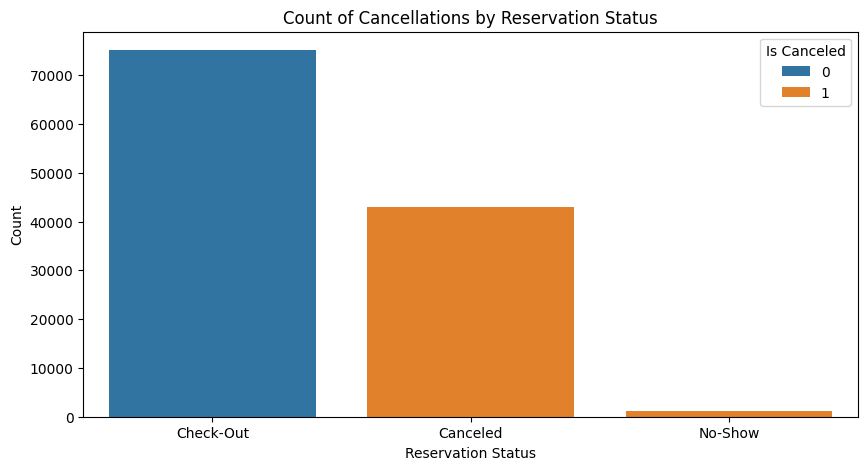

In [27]:
plt.figure(figsize = (10, 5))
sns.countplot(
              data = df,
              x = df['reservation_status'],
              hue = df['is_canceled'].astype(str),
              )
plt.title('Count of Cancellations by Reservation Status')
plt.xlabel('Reservation Status')
plt.ylabel('Count')
plt.legend(title = 'Is Canceled')
plt.show()

In [28]:
print(
    'Reservation Status vs Cancellation \n',
    "-" * 32,
    '\n',
      df
      .groupby(['reservation_status'])
      .agg({'is_canceled':'mean'})
      .reset_index()
)

Reservation Status vs Cancellation 
 -------------------------------- 
   reservation_status  is_canceled
0           Canceled          1.0
1          Check-Out          0.0
2            No-Show          1.0


It is clear from the plot that all the bookings with a reservation_status of "Canceled" or "No-Show" are indeed canceled (is_canceled= 1), and all the bookings with a reservation_status of "Check-Out" are not canceled (is_canceled = 0).

This confirms that the **reservation_status** feature is **directly** related to the is_canceled target variable and including it in the model would cause data leakage. Therefore, it is essential to remove the reservation_status feature before training the model.

In [29]:
df = df.drop(['reservation_status'], axis=1)

In [30]:
print('='*115)

|variable                        |class       |description                                                                                      |
|:-------------------------------|:-----------|:------------------------------------------------------------------------------------------------|
|reservation_status_date         |date        |The date at which the last status was set.                                                       |

**reservation_status_date** is a date feature that indicates the latest date at which the reservation_status was updated. This feature is directly related to the target variable is_canceled for the following reasons:

 - If a booking was canceled, the **reservation_status_date** would be the date on which the booking was canceled, which will be earlier than the arrival date, implying that is_canceled should be 1.
 - Similarly, if a booking was not canceled, the **reservation_status_date** would reflect the date of check-out, which would be later than the arrival date implying that is_canceled should be 0.


Therefore, the **reservation_status_date** can indirectly give us information about the value of the target variable, leading to data leakage if it is used as a feature in the model.

In [31]:
"""
Calculate the difference in days between the reservation_status_date and the arrival_date to create a 
new feature representing the number of days between the last reservation status and the arrival date.
"""

df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

df['reservation_status_days_difference'] = (df['reservation_status_date'] 
                                            - pd.to_datetime(
                                                df['arrival_date_year'].astype(str) 
                                                + '-' 
                                                + df['arrival_date_month']
                                                + '-' 
                                                + df['arrival_date_day_of_month'].astype(str)
                                            )).dt.days

df[['reservation_status_days_difference']].head()

,reservation_status_days_difference
0,0
1,0
2,1
3,1
4,2


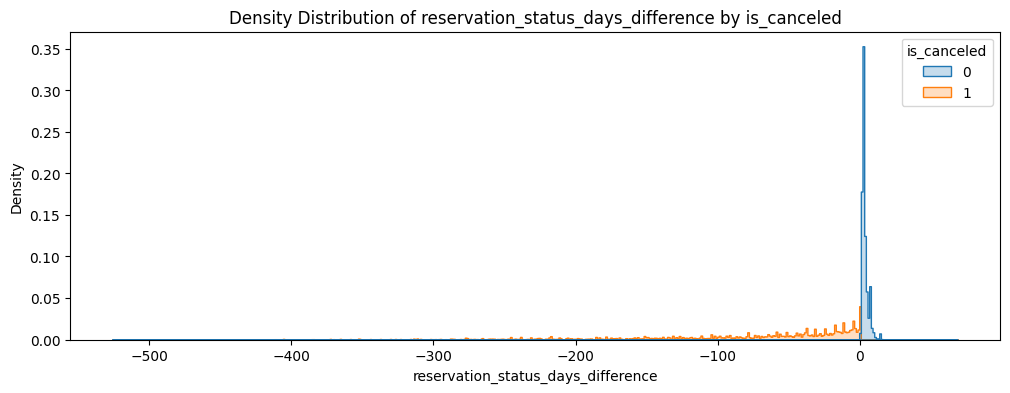

In [32]:
plt.figure(figsize=(12, 4))
sns.histplot(data=df, 
             x=df['reservation_status_days_difference'], 
             hue=df['is_canceled'], 
             element="step", 
             stat="density",
             common_norm=False
            )
plt.title('Density Distribution of reservation_status_days_difference by is_canceled')
plt.show()

In [33]:
print("Distribution of 'is_canceled' when 'reservation_status_days_difference' is positive:\n",
     df[df['reservation_status_days_difference'] > 0]['is_canceled'].value_counts())

Distribution of 'is_canceled' when 'reservation_status_days_difference' is positive:
 is_canceled
0    74460
Name: count, dtype: int64


In [34]:
print("Distribution of 'is_canceled' when 'reservation_status_days_difference' is negative:\n",
      df[df['reservation_status_days_difference'] < 0]['is_canceled'].value_counts())

Distribution of 'is_canceled' when 'reservation_status_days_difference' is negative:
 is_canceled
1    42137
Name: count, dtype: int64


The **reservation_status_days_difference** feature represents the number of days between the arrival date and the date at which the reservation status was last updated.

 - Positive values indicate that the reservation status was updated after the arrival date. Since is_canceled is always 0 for these rows, it suggests that these bookings were not canceled and the reservation status was updated (e.g., to 'Check-Out') after the guest arrived.
 - Negative values indicate that the reservation status was updated before the arrival date. Since is_canceled is always 1 for these rows, it suggests that these bookings were canceled before the arrival date.

This shows a clear relationship between the **reservation_status_days_difference** and the **is_canceled** feature. If a booking is canceled, the reservation status is usually updated before the arrival date or if a booking is not canceled, the reservation status is usually updated after the arrival date.

We drop the **reservation_status_date** feature and the newly created **reservation_status_days_difference** to stop data leakage in the model.

In [35]:
df = df.drop(['reservation_status_date', 'reservation_status_days_difference'], axis=1)

|variable                        |class       |description                                                                                      |
|:-------------------------------|:-----------|:------------------------------------------------------------------------------------------------|
|assigned_room_type              |categorical |The code for type of room assigned                                                               |

In [36]:
print('='*115)

The **assigned_room_type** feature represents the type of room assigned to the guest. It may be assigned after the booking is made, so it cannot be used to predict cancellations. Since I am no subject matter expert, we will drop this feature because of the threat of data leakage.

In [37]:
df = df.drop(['assigned_room_type'], axis=1)

### Drop Irrelevant Features

In [38]:
df['arrival_date_year'].value_counts()

arrival_date_year
2016    56707
2017    40687
2015    21996
Name: count, dtype: int64

The **arrival_date_year** feature only includes a few years in the past, and if we want to build a model that generalizes well to future data, we should not to include features that could bias the model towards specific years. Therefore, it is reasonable to drop **arrival_date_year**.

In [39]:
df = df.drop(['arrival_date_year'], axis=1)

In [40]:
print('='*115)

High cardinality refers to a column that can have many possible values. It increases dimensionality significantly, especially when dealing with categorical variables having a large number of unique categories (high cardinality). This can lead to the “curse of dimensionality”, making the dataset more sparse and potentially affecting the performance of some machine learning algorithms.

In [41]:
high_cardinality_features = ['country', 'agent', 'company']

unique_categories = df[high_cardinality_features].nunique()
missing_values = df[high_cardinality_features].isnull().sum()
missing_percent = df[high_cardinality_features].isnull().sum()/len(df)

high_cardinality_df = pd.DataFrame({'Unique_Categories': unique_categories 
                                    ,'Missing_Values': missing_values
                                    ,'Missing_Percent': missing_percent
                                   })

high_cardinality_df

,Unique_Categories,Missing_Values,Missing_Percent
country,177,488,0.004087
agent,333,16340,0.136862
company,352,112593,0.943069


* country:
    * **Description**: Country of origin of the guest.
    * **Action**: There are 177 unique countries, this high cardinality will be a problem so we will group the countries by continent. There are 488 (0.04%) missing values in this column, we can drop these columns without losing much information, we can also drop the feature itself if it doesn't bring enough explanatory power, doing a KNNImputer is one possibility, but the decision will need subject matter expertise.
    
* agent:
    * **Description**: ID of the travel agent responsible for the booking.
    * **Action**: There the feature is missing around 13% of the variables, which can be easily fixed by KNNImputer for example, however this feature has many unique categories causing high cardinality features, and some agents may only appear a few times in the dataset, which could cause overfitting. We could create a new feature representing the number of bookings made by each agent to capture the experience of the agent and then drop the original agent feature. However, this new feature may not be very meaningful because the number of bookings made by an agent may not be directly related to the cancellation rate. For now, we will omit this feature.
    
* company:
    * **Description**: ID of the company responsible for the booking.
    * **Action**: This feature has a high percentage of missing values and may not be very informative for predicting cancellations, so it may be better to drop it entirely.

In [42]:
df = df.dropna(subset = 'country', axis = 0)

In [43]:
conditions = [
    df['country'].isin(['PRT', 'GBR', 'ESP', 'IRL', 'FRA', 'ROU', 'NOR', 'POL', 'DEU', 'BEL', 'CHE', 'GRC', 'ITA', 'NLD', 'DNK', 'RUS', 'SWE', 'EST', 'CZE', 'FIN', 'LUX', 'SVN', 'ALB', 'UKR', 'SMR', 'LVA', 'SRB', 'AUT', 'BLR', 'LTU', 'TUR', 'HRV', 'AND', 'GIB', 'URY', 'JEY', 'GGY', 'SVK', 'HUN', 'BIH', 'BGR', 'CIV', 'MKD', 'ISL', 'MLT', 'IMN', 'LIE', 'MNE', 'FRO']),
    df['country'].isin(['USA', 'CAN', 'MEX', 'PRI', 'JAM', 'CYM', 'ZMB', 'KNA', 'TWN', 'GLP', 'BRB', 'DMA', 'PYF', 'ASM', 'UMI', 'VGB']),
    df['country'].isin(['ARG', 'BRA', 'CHL', 'URY', 'COL', 'VEN', 'SUR', 'ECU', 'PER', 'BOL', 'PRY', 'GUY']),
    df['country'].isin(['CHN', 'IND', 'KOR', 'HKG', 'IRN', 'ARE', 'GEO', 'ARM', 'ISR', 'PHL', 'SEN', 'IDN', 'JPN', 'KWT', 'MDV', 'THA', 'MYS', 'LKA', 'SGP', 'MMR', 'UZB', 'KAZ', 'BDI', 'SAU', 'VNM', 'TJK', 'PAK', 'IRQ', 'NPL', 'BGD', 'QAT', 'JAM', 'MAC', 'TGO', 'RWA', 'KHM', 'SYR', 'JAM', 'JEY']),
    df['country'].isin(['MOZ', 'MAR', 'AGO', 'ZAF', 'EGY', 'NGA', 'KEN', 'ZWE', 'DZA', 'TUN', 'CMR', 'CIV', 'COM', 'UGA', 'GAB', 'GNB', 'MRT', 'DJI', 'STP', 'KEN', 'TZA', 'SDN', 'LBR', 'LKA']),
    df['country'].isin(['AUS', 'FJI', 'NZL', 'PNG', 'PLW', 'NCL', 'KIR', 'FSM', 'SLB', 'NRU', 'TUV', 'TON', 'WSM', 'ASA', 'ATF', 'FJI']),
    df['country'].isin(['UNK', 'ATA', 'PYF', 'FRO'])
]

choices = [
    'Europe',
    'North America',
    'South America',
    'Asia',
    'Africa',
    'Oceania',
    'Others'
]

df['continent'] = np.select(conditions, choices, default='Others')



In [44]:
df = df.drop(['agent', 'company', 'country'], axis=1)

### Handle Missing Values

In [45]:
df.isna().sum()[df.isna().sum() > 0]

children    4
dtype: int64

<Axes: xlabel='children', ylabel='Count'>

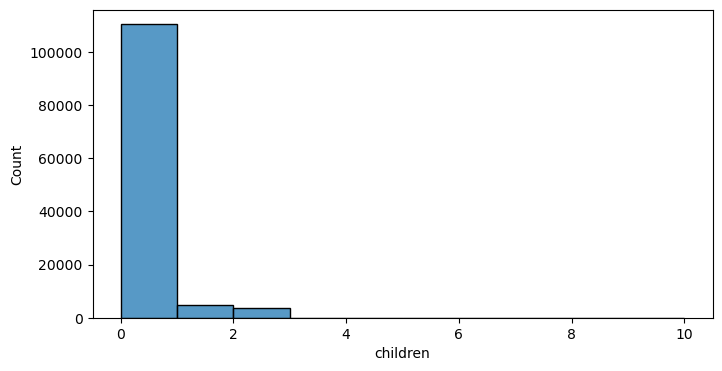

In [28]:
sns.histplot(df['children'],bins=10)

The children feature has 4 missing values and is a numerical feature. Given the distribution of values in the children column, the majority of bookings have 0 children, which is a strong mode. Statistically and also logically it would be reasonable to impute the missing values with 0 (the mode of the column), since if a customer didn't specify how many children they're coming with it's a reasonable assumption that they are coming with none. This approach is simple and will not introduce significant bias.

In [29]:
df['children'] = df['children'].fillna(0)
df['children'].isnull().sum()

0

### Handle Noisy Data

Now let's analyze and handle the noisy data in the adr, adults, children, and babies columns as discussed previously.

In [30]:
noisy_data = {
    'adr':      df[df['adr'] < 0],
    'adults':   df[df['adults'] == 0],
    'children': df[df['children'] == 10],
    'babies':   df[df['babies'] == 10],
}

noisy_data_count = {key: len(value) for key, value in noisy_data.items()}
noisy_data_count

{'adr': 1, 'adults': 393, 'children': 1, 'babies': 1}

We have identified some noisy data in the following features:

* **adr**: There is 1 booking with a negative Average Daily Rate (ADR), which doesn't make sense and indicates a potential error or special case. Since there is only one negative value, it would be reasonable to replace it with the median or mean of the adr column, as this will not significantly affect the distribution of the data.
* **adults**: There are 403 bookings with 0 adults, which could be a data entry error unless there are legitimate cases where only children or babies book a room. this unlikely that a booking would be made with 0 adults, so these 403 rows seem to be errors. Given that this is a small proportion of the dataset, it would be reasonable to remove these rows.
* **children**: There is 1 booking with 10 children, which seems unusually high for a single booking and could be a potential outlier or data entry error. Since there is only one booking with 10 children, it could be considered as an outlier and removed from the dataset.
* **babies**: There is 1 booking with 10 babies, which seems unusually high for a single booking and could be a potential outlier or data entry error. since there is only one booking with 10 babies, it could be considered as an outlier and removed from the dataset.

In [31]:
df['adr'] = np.where(
        df['adr'] < 0, 
        df['adr'].median(), 
        df['adr']
)

df = df[df['adults'] != 0]
df = df[df['children'] < 10]
df = df[df['babies'] < 10]

In [32]:
noisy_data_handled = {
    'adr': df[df['adr'] < 0],
    'adults': df[df['adults'] == 0],
    'children': df[df['children'] == 10],
    'babies': df[df['babies'] == 10],
}

noisy_data_cleaned_count = {key: len(value) for key, value in noisy_data_handled.items()}
noisy_data_cleaned_count

{'adr': 0, 'adults': 0, 'children': 0, 'babies': 0}

## Feature Engineering

Here we will do some feature engineering.

We will try to transform the existing columns such that our new features may add some predictive power to the model

**arrival_date_day_of_month** is an ordinal variable, consisting of up to 31 variables, these may introduce the problem of high cardinality, hence we will try to group these values by the period of month they belong to:
 * Beginning of the Month
 * Middle of the Month
 * End of the Month

In [33]:
conditions = [
    df['arrival_date_day_of_month'] < 11,
    df['arrival_date_day_of_month'] < 21
]

choices = [
    'BoM', #Beginning of Month
    'MoM', #Middle of Month
]

df['arrival_date_day_of_month']  = np.select(conditions, choices, default='EoM') #End of Month

We will transform the month date into an ordinal variable later. Other than that there is no feature (text data for example) that can be transformed or grouped such that it will add explanatory power to the model.

Hence, this is all the feature engineering for now.

## Correlation Analysis

Here we will utilse Filter methods to select features based on characteristics in the data. Filter methods look at each feature individually, or compare them to other features, and assess how important they are.

Feature Selection is important for several reasons:
 - Easier to interpret
 - Less redundant (have reduced feature redundancy)
 - Faster to train
 - Easier to deploy to production

In [34]:
numeric_features = [col for col in df.columns if pd.api.types.is_numeric_dtype(df[col]) and col != 'is_canceled']
object_features = [col for col in df.columns if pd.api.types.is_object_dtype(df[col])]

print("Numeric features:", numeric_features)
print("Object features:", object_features)

Numeric features: ['lead_time', 'arrival_date_week_number', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']
Object features: ['hotel', 'arrival_date_month', 'arrival_date_day_of_month', 'meal', 'market_segment', 'distribution_channel', 'reserved_room_type', 'deposit_type', 'customer_type', 'continent']


We will use Chi-square test and ANOVA tests to see how important each feature is. Chi-square is used when we have categorical variables and a categorical target and ANOVA is used when we have continuous variables and a categorical target.

One crucial assumption of these methods is that the numeric features are normally distributed.

### Chi-Square

In [35]:
df_encoded = pd.get_dummies(df[object_features])
target = df['is_canceled']

best_features = SelectKBest(score_func=chi2, k='all')
fit = best_features.fit(df_encoded, target)

feature_scores = pd.DataFrame(data={'Feature': df_encoded.columns, 'Chi-Squared Score': fit.scores_})
feature_scores = feature_scores.sort_values(by='Chi-Squared Score', ascending=False)
feature_scores.style.background_gradient()

,Feature,Chi-Squared Score
45,deposit_type_Non Refund,24128.504033
26,market_segment_Groups,4858.254182
44,deposit_type_No Deposit,3370.342592
25,market_segment_Direct,2507.603583
31,distribution_channel_Direct,2371.405509
50,customer_type_Transient-Party,1474.215076
1,hotel_Resort Hotel,1433.171195
0,hotel_City Hotel,718.810088
24,market_segment_Corporate,707.079609
33,distribution_channel_TA/TO,638.136065


### ANOVA

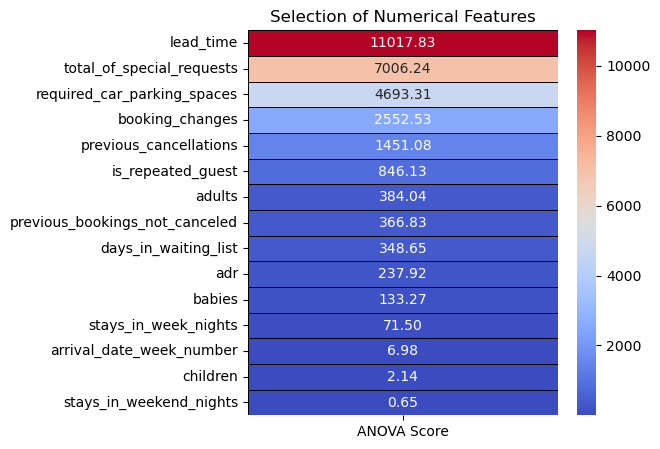

In [36]:
from sklearn.feature_selection import f_classif
features = df.loc[:,numeric_features]
target = df.loc[:,'is_canceled']

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'ANOVA Score'),annot = True,cmap = 'coolwarm',linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Numerical Features');

Here we see that continent_Asia
 - arrival_date_month_July
 - arrival_date_day_of_month_MoM
 - meal_SC
 - reserved_room_type_G
 - reserved_room_type_L
 - stays_in_weekend_nights
 - children
 
all have relatively low explanatory power, for linear models (Logistic regression for example) dropping these features won't damage the performance much. But since We assume that the all the variables are normally distributed (and this is not the case as we will see later), we don't drop these variables for now. 

Other types of feature selection methods (Like Wrapper or Embedded) may be used later.

# Exploratory Data Analysis

In [37]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,continent
0,Resort Hotel,0,342,July,27,BoM,0,0,2,0.0,0,BB,Direct,Direct,0,0,0,C,3,No Deposit,0,Transient,0.0,0,0,Europe
1,Resort Hotel,0,737,July,27,BoM,0,0,2,0.0,0,BB,Direct,Direct,0,0,0,C,4,No Deposit,0,Transient,0.0,0,0,Europe
2,Resort Hotel,0,7,July,27,BoM,0,1,1,0.0,0,BB,Direct,Direct,0,0,0,A,0,No Deposit,0,Transient,75.0,0,0,Europe
3,Resort Hotel,0,13,July,27,BoM,0,1,1,0.0,0,BB,Corporate,Corporate,0,0,0,A,0,No Deposit,0,Transient,75.0,0,0,Europe
4,Resort Hotel,0,14,July,27,BoM,0,2,2,0.0,0,BB,Online TA,TA/TO,0,0,0,A,0,No Deposit,0,Transient,98.0,0,1,Europe


In [38]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,118507.0,0.371767,0.483279,0.0,0.0,0.0,1.0,1.0
lead_time,118507.0,104.360578,106.931291,0.0,18.0,69.0,161.0,737.0
arrival_date_week_number,118507.0,27.166235,13.583760,1.0,16.0,28.0,38.0,53.0
stays_in_weekend_nights,118507.0,0.928181,0.992834,0.0,0.0,1.0,2.0,16.0
stays_in_week_nights,118507.0,2.500705,1.889624,0.0,1.0,2.0,3.0,40.0
adults,118507.0,1.864565,0.569538,1.0,2.0,2.0,2.0,55.0
children,118507.0,0.100644,0.389739,0.0,0.0,0.0,0.0,3.0
babies,118507.0,0.007865,0.092987,0.0,0.0,0.0,0.0,9.0
is_repeated_guest,118507.0,0.031644,0.175050,0.0,0.0,0.0,0.0,1.0
previous_cancellations,118507.0,0.087353,0.847191,0.0,0.0,0.0,0.0,26.0


In [39]:
df.describe(include='object').T

,count,unique,top,freq
hotel,118507,2,City Hotel,78923
arrival_date_month,118507,12,August,13808
arrival_date_day_of_month,118507,3,EoM,40367
meal,118507,5,BB,91575
market_segment,118507,8,Online TA,56146
distribution_channel,118507,5,TA/TO,97420
reserved_room_type,118507,9,A,85470
deposit_type,118507,3,No Deposit,103772
customer_type,118507,4,Transient,88906
continent,118507,7,Europe,107758


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118507 entries, 0 to 119389
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118507 non-null  object 
 1   is_canceled                     118507 non-null  int64  
 2   lead_time                       118507 non-null  int64  
 3   arrival_date_month              118507 non-null  object 
 4   arrival_date_week_number        118507 non-null  int64  
 5   arrival_date_day_of_month       118507 non-null  object 
 6   stays_in_weekend_nights         118507 non-null  int64  
 7   stays_in_week_nights            118507 non-null  int64  
 8   adults                          118507 non-null  int64  
 9   children                        118507 non-null  float64
 10  babies                          118507 non-null  int64  
 11  meal                            118507 non-null  object 
 12  market_segment       

## Histograms

In [41]:
def histograms(df,kde=True):
    
    sns.set_theme(style='whitegrid')

    n_cols = 3  
    num_features = len(df.columns)
    n_rows = math.ceil(num_features / n_cols)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
    plt.subplots_adjust(wspace=0.8, hspace=0.5 , bottom=0.30)

    for i, columns in enumerate(df.columns):
        row = i // n_cols
        col = i % n_cols

        sns.histplot(data=df, 
                     kde=kde, 
                     x=columns, 
                     ax=axes[row, col]
                    )
        axes[row, col].set_title(f'Distribution of {columns}')
        axes[row, col].set_xlabel(columns)
        axes[row, col].set_ylabel('Frequency')

    fig.tight_layout(pad=2.0)
    plt.show()

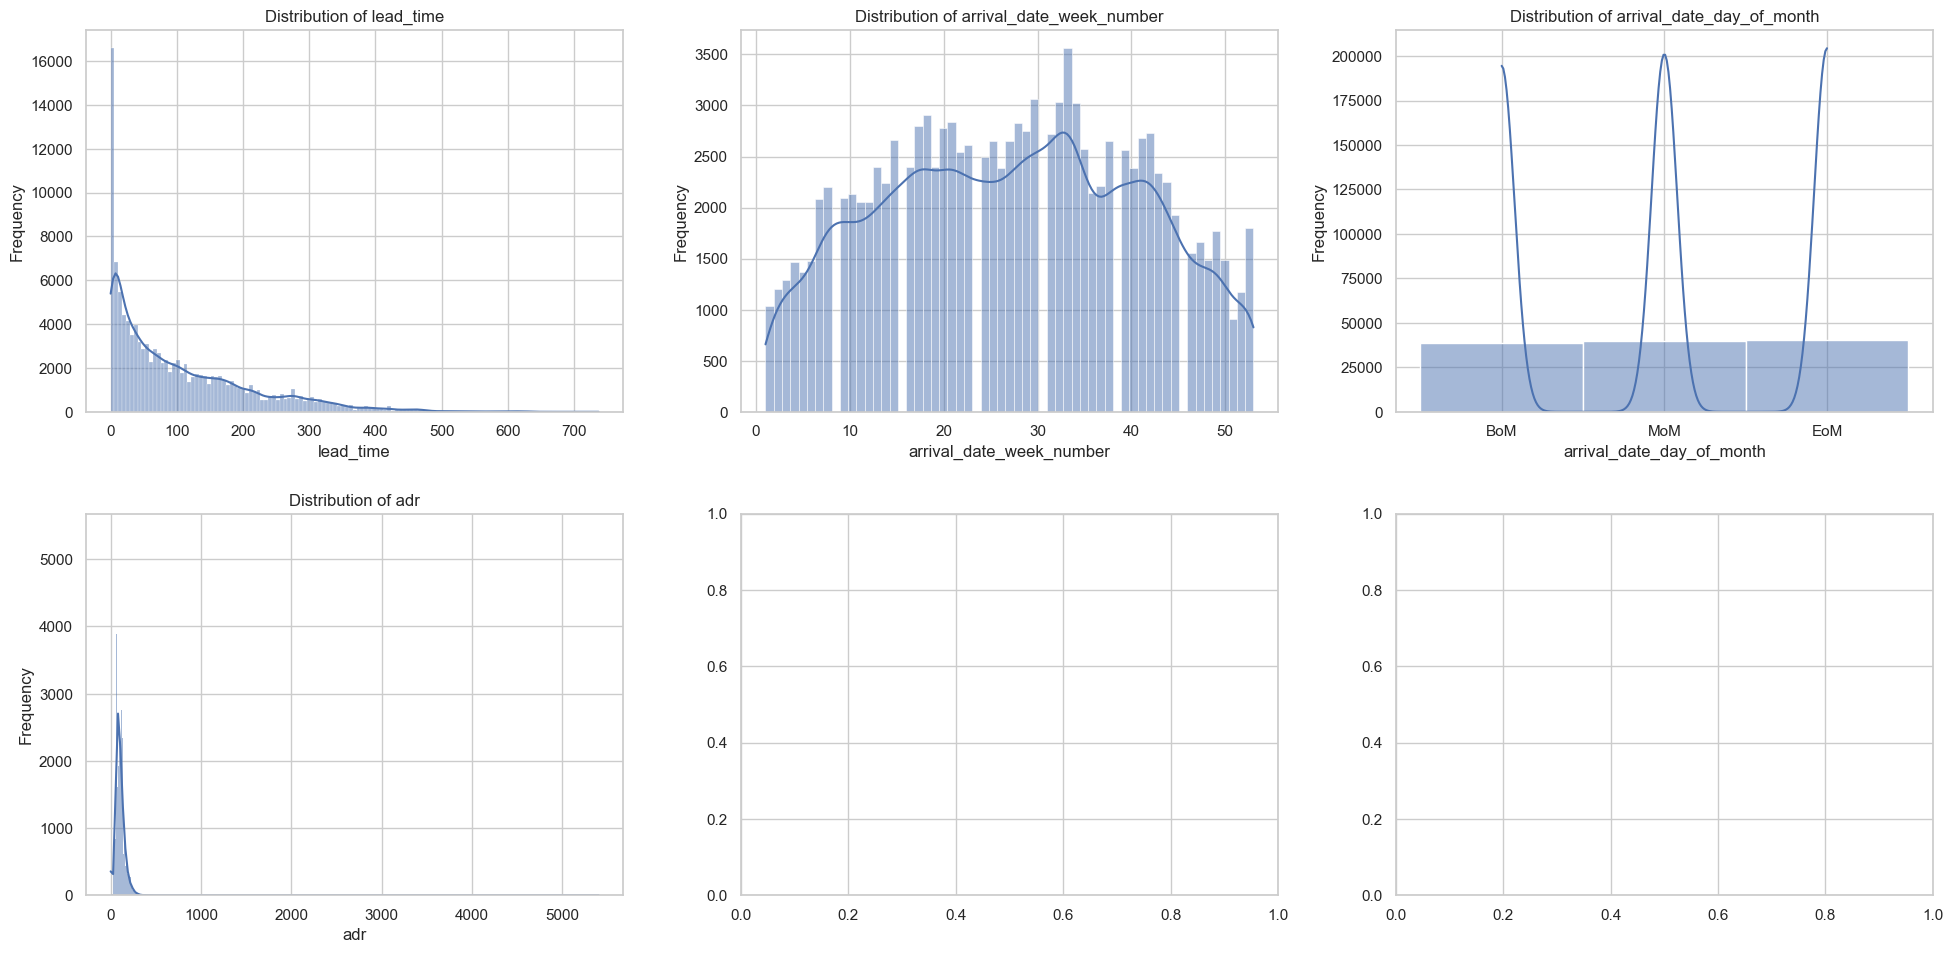

In [42]:
colums_hist = [
                'lead_time'
                ,'arrival_date_week_number'
                ,'arrival_date_day_of_month' 
                ,'adr'
]

histograms(df[colums_hist],kde=True)

Here we see the distribution of some numeric variables. Lead time and adr aren't normally distributed.

In [43]:
def histplots_2(df):
    
    sns.set_theme(style='whitegrid')

    n_cols = 3  
    num_features = len(df.columns)
    n_rows = math.ceil(num_features / n_cols)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
    plt.subplots_adjust(wspace=0.8, hspace=0.5 , bottom=0.30)

    for i, columns in enumerate(df.columns):
        row = i // n_cols
        col = i % n_cols

        sns.histplot(data = df, 
                    x = columns, 
                    ax = axes[row, col],
                    bins=df[columns].nunique())
        axes[row, col].set_title(f'Distribution of {columns}')
        axes[row, col].set_xlabel(columns)
        axes[row, col].set_ylabel('Frequency')

    fig.tight_layout(pad=2.0)
    plt.show()

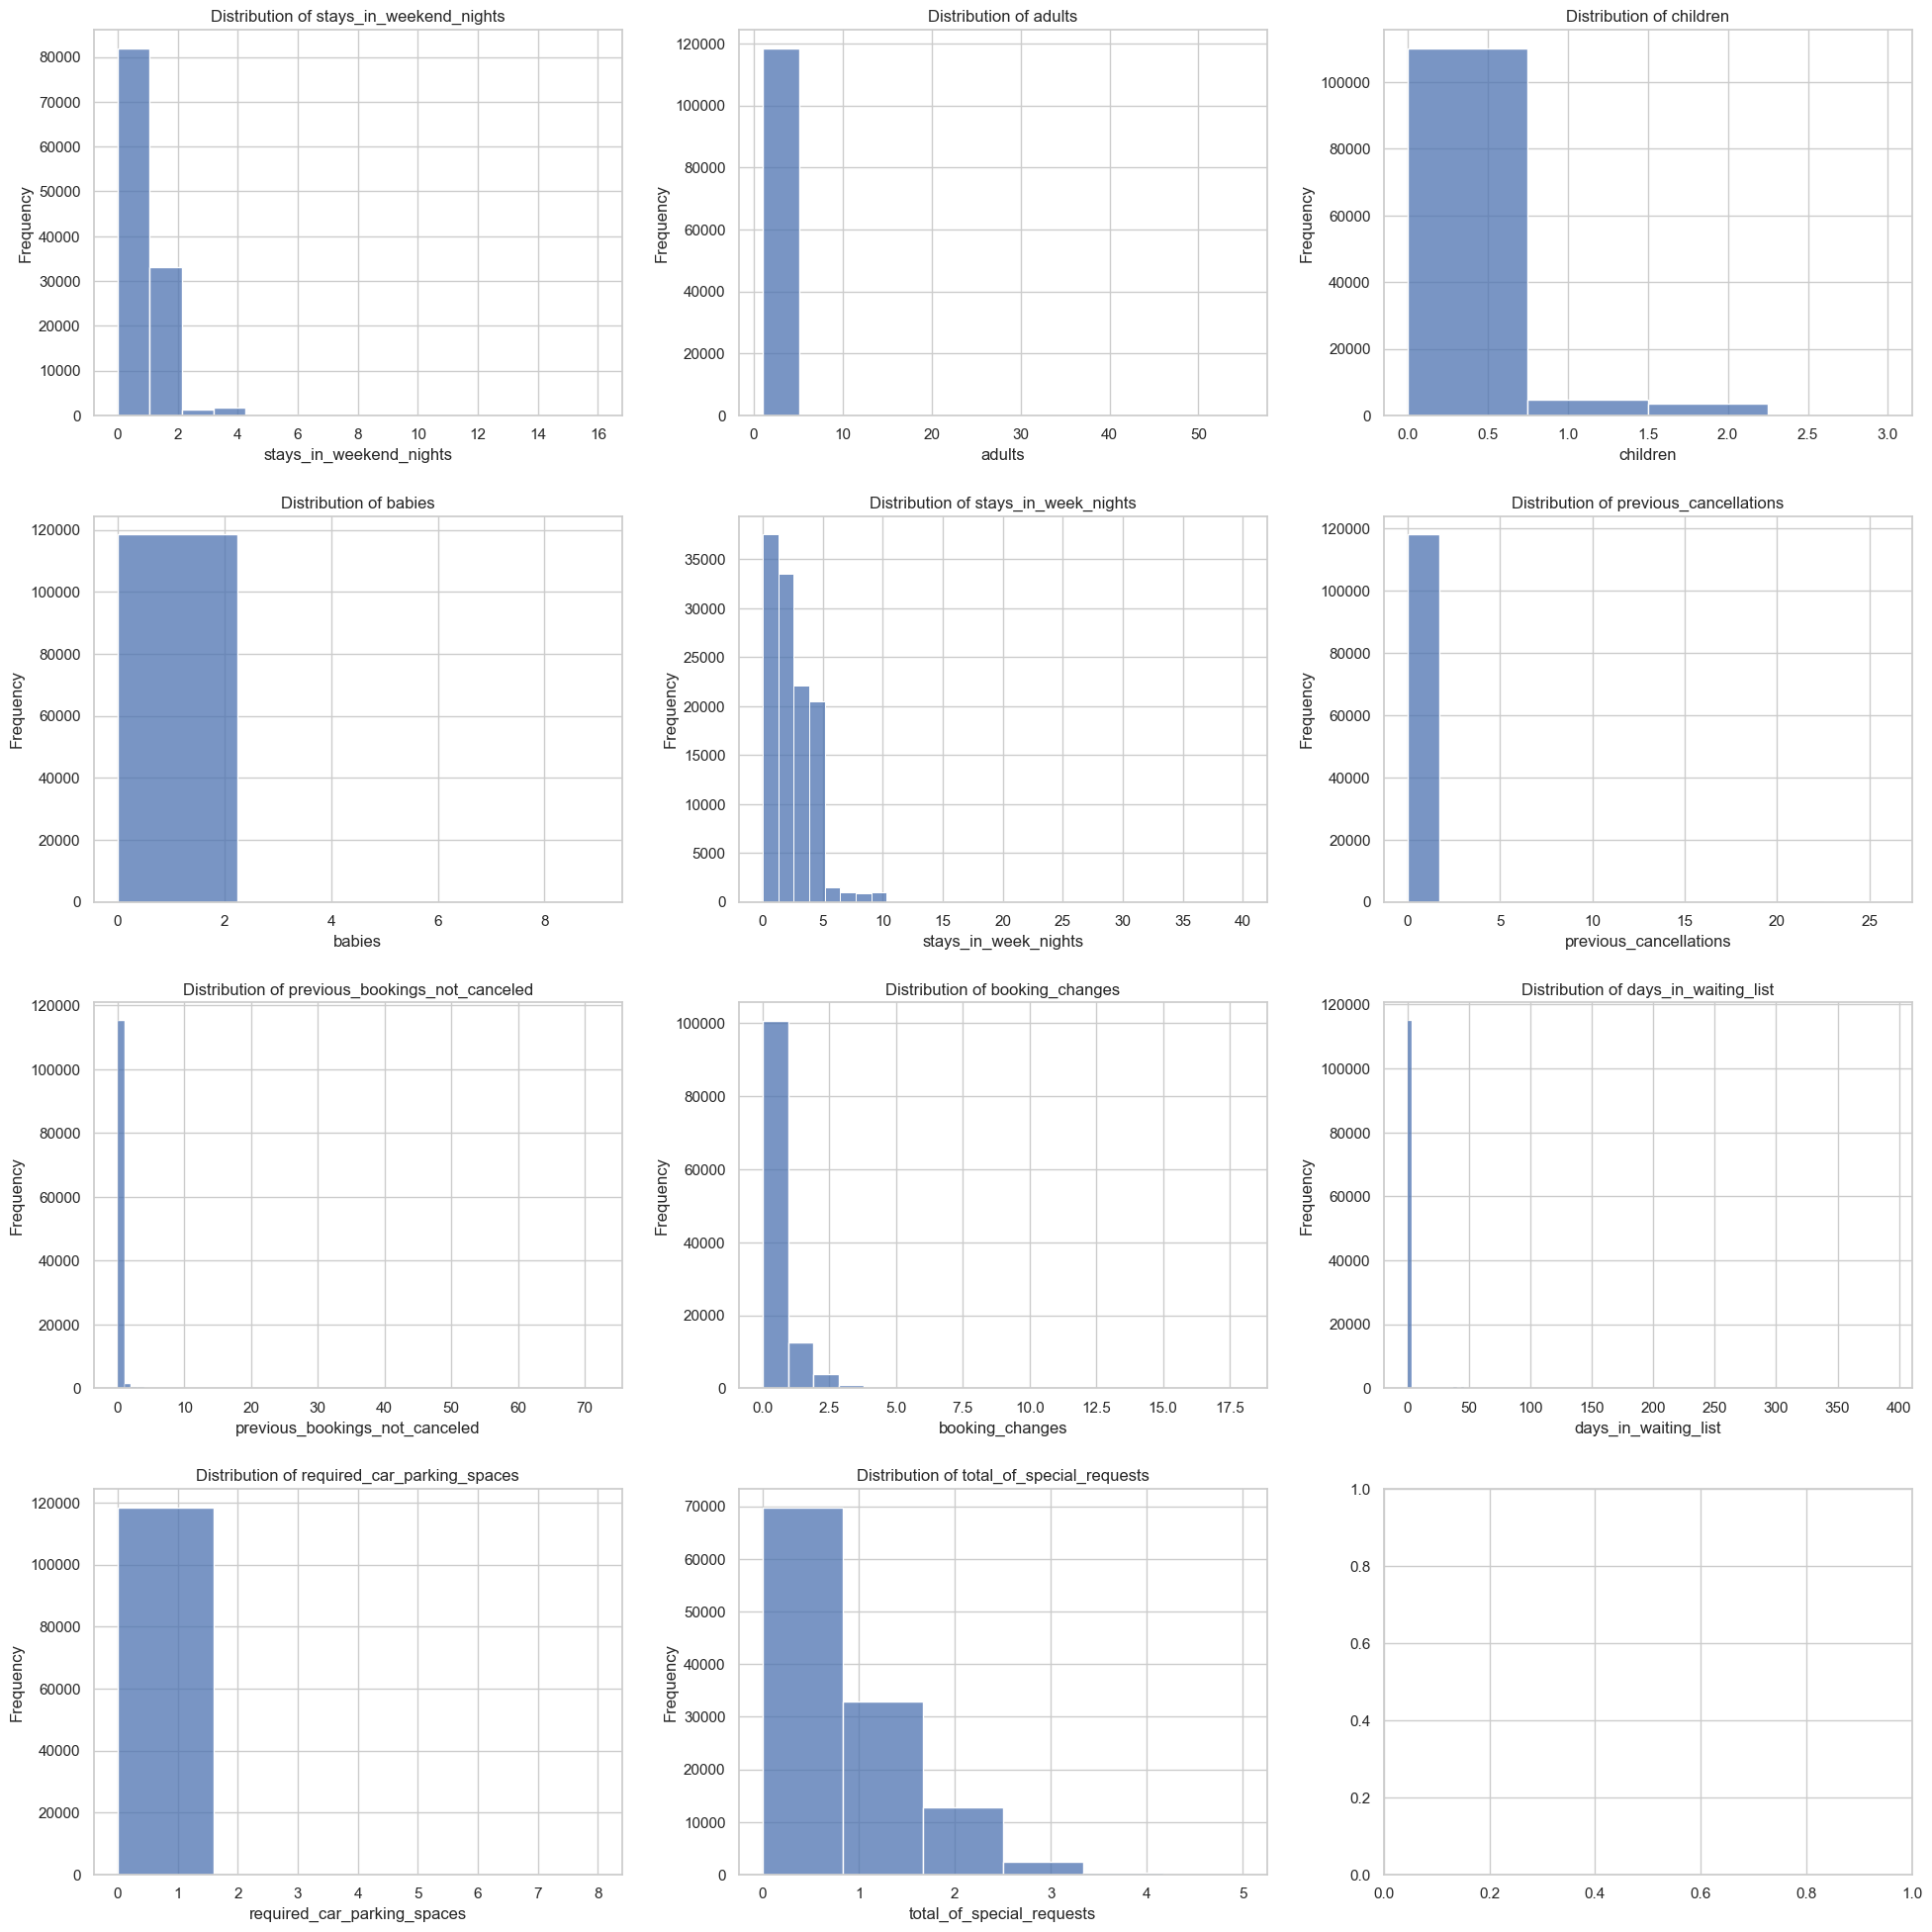

In [44]:
colums_hist = [ 
            'stays_in_weekend_nights'
            ,'adults'
            ,'children'
            ,'babies'
            ,'stays_in_week_nights'
            ,'previous_cancellations'
            ,'previous_bookings_not_canceled'
            ,'booking_changes'
            ,'days_in_waiting_list'
            ,'required_car_parking_spaces'
            ,'total_of_special_requests'
]
histplots_2(df[colums_hist])

Nothing interesting to point out here. the categorical variables are skewed to the right

## Check Imbalance

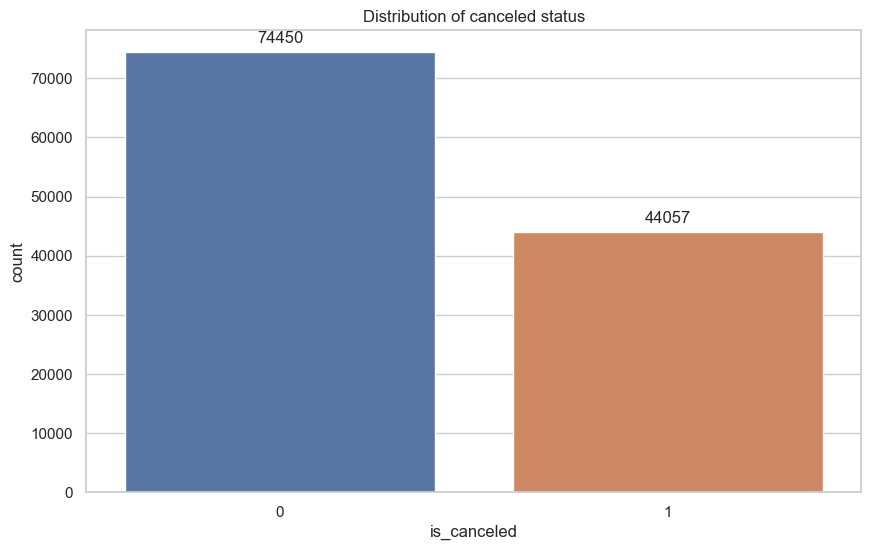

In [45]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(
            data=df,
            x='is_canceled')
for i in ax.patches:
    height = int(i.get_height())
    ax.annotate(f'{height}', (i.get_x() + i.get_width() / 2, height),
                ha='center', va='center', xytext=(0, 10), 
                textcoords='offset points',
               )
plt.title('Distribution of canceled status')
plt.show()

In [46]:
df['is_canceled'].value_counts(normalize=True)

is_canceled
0    0.628233
1    0.371767
Name: proportion, dtype: float64

Approximately 37% of the bookings were canceled, and 62% were not canceled. This indicates that there is some imbalance in the target variable, but not that high. Generally, a dataset is considered highly imbalanced if one class represents over 80-90% of the data. In this case, the minority class (canceled) is still well-represented, so it may not be necessary to apply any resampling or synthetic oversampling techniques (e.g., oversampling, undersampling, SMOTE) to balance the classes.

## Barplots

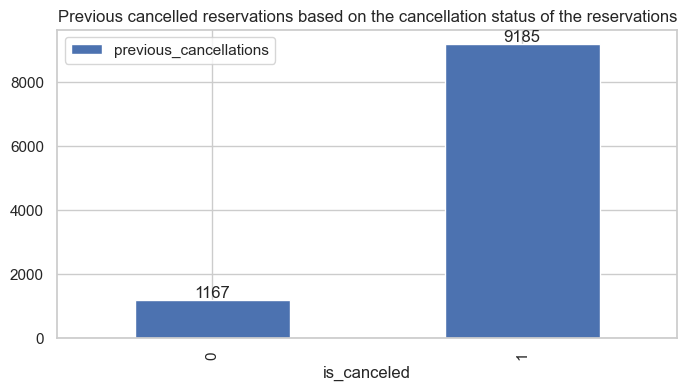

In [47]:
ax = (df
      .groupby("is_canceled")
      .agg({"previous_cancellations":'sum'})
      .plot
      .bar())
ax.bar_label(ax.containers[0])
plt.title('Previous cancelled reservations based on the cancellation status of the reservations');

It is more often that a client has canceled a booking, if they had canceled a booking in the past.

This could be an important feature for our model.

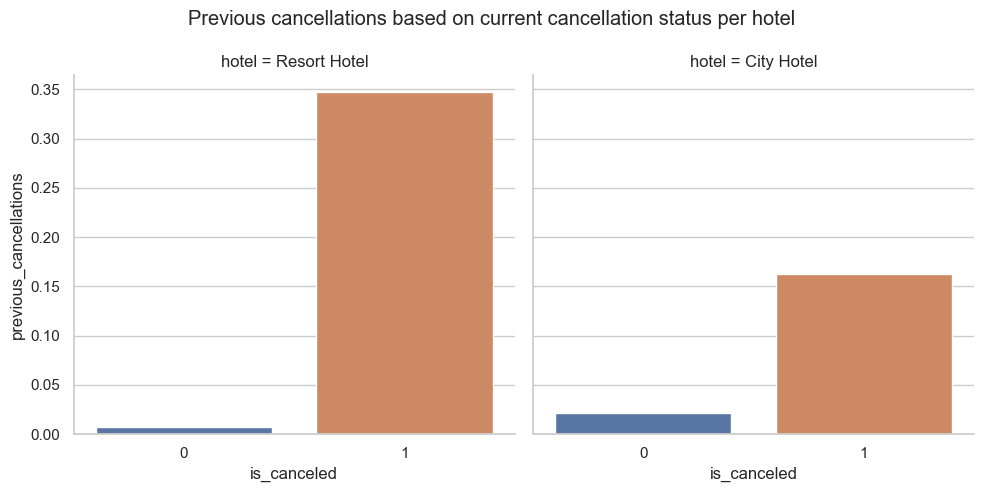

In [48]:
sns.catplot(
    data=df, 
    x = "is_canceled", 
    y = "previous_cancellations", 
    col = "hotel",
    kind = "bar", 
    ci = None
)
plt.suptitle('Previous cancellations based on current cancellation status per hotel')
plt.tight_layout();

It looks like more cancellations have happened at Resort Hotel.

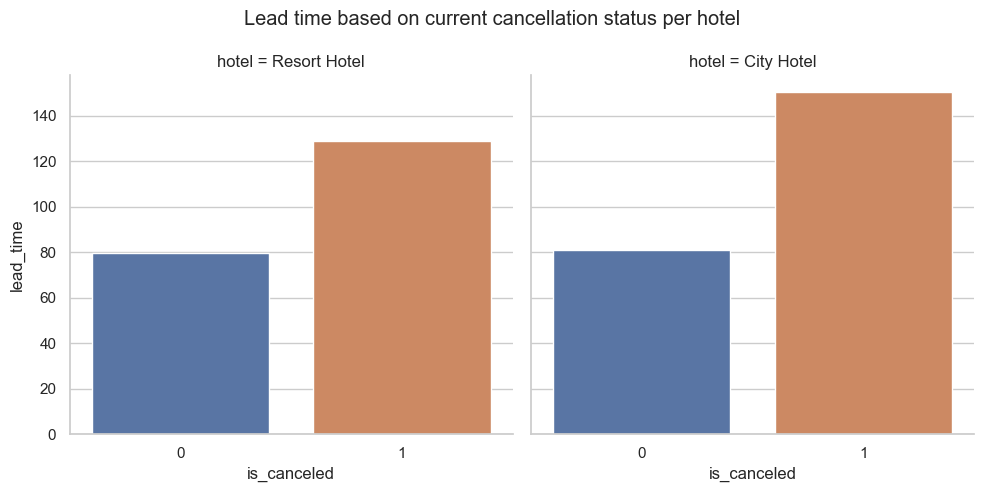

In [49]:
sns.catplot(
    data=df, 
    x = "is_canceled", 
    y = "lead_time", 
    col = "hotel",
    kind = "bar", 
    ci = None
)
plt.suptitle('Lead time based on current cancellation status per hotel')
plt.tight_layout();

The lead time and canceled distributions look the same for both hotels.

## Distribution of cancellations based on features¶

In [50]:
def canceled_countplot(df):

    sns.set_theme(style='whitegrid')  

    n_cols = 3 
    num_features = len(df.columns)
    n_rows = math.ceil(num_features / n_cols)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
    plt.subplots_adjust(wspace=0.8, hspace=0.5 , bottom=0.30)

    for i, columns in enumerate(df.columns):
        row = i // n_cols
        col = i % n_cols

        sns.countplot(data=df, 
                      x=df[columns].astype(str), 
                      hue=df['is_canceled'].astype(str),  
                      ax=axes[row, col]
                     )
        axes[row, col].set_title(f'Distribution of Canceled Reservations by {columns}')
        axes[row, col].set_xlabel(columns)
        axes[row, col].set_ylabel('Number of Reservations')
        axes[row, col].legend(title='Canceled')

    fig.tight_layout(pad=2.0)
    plt.show()

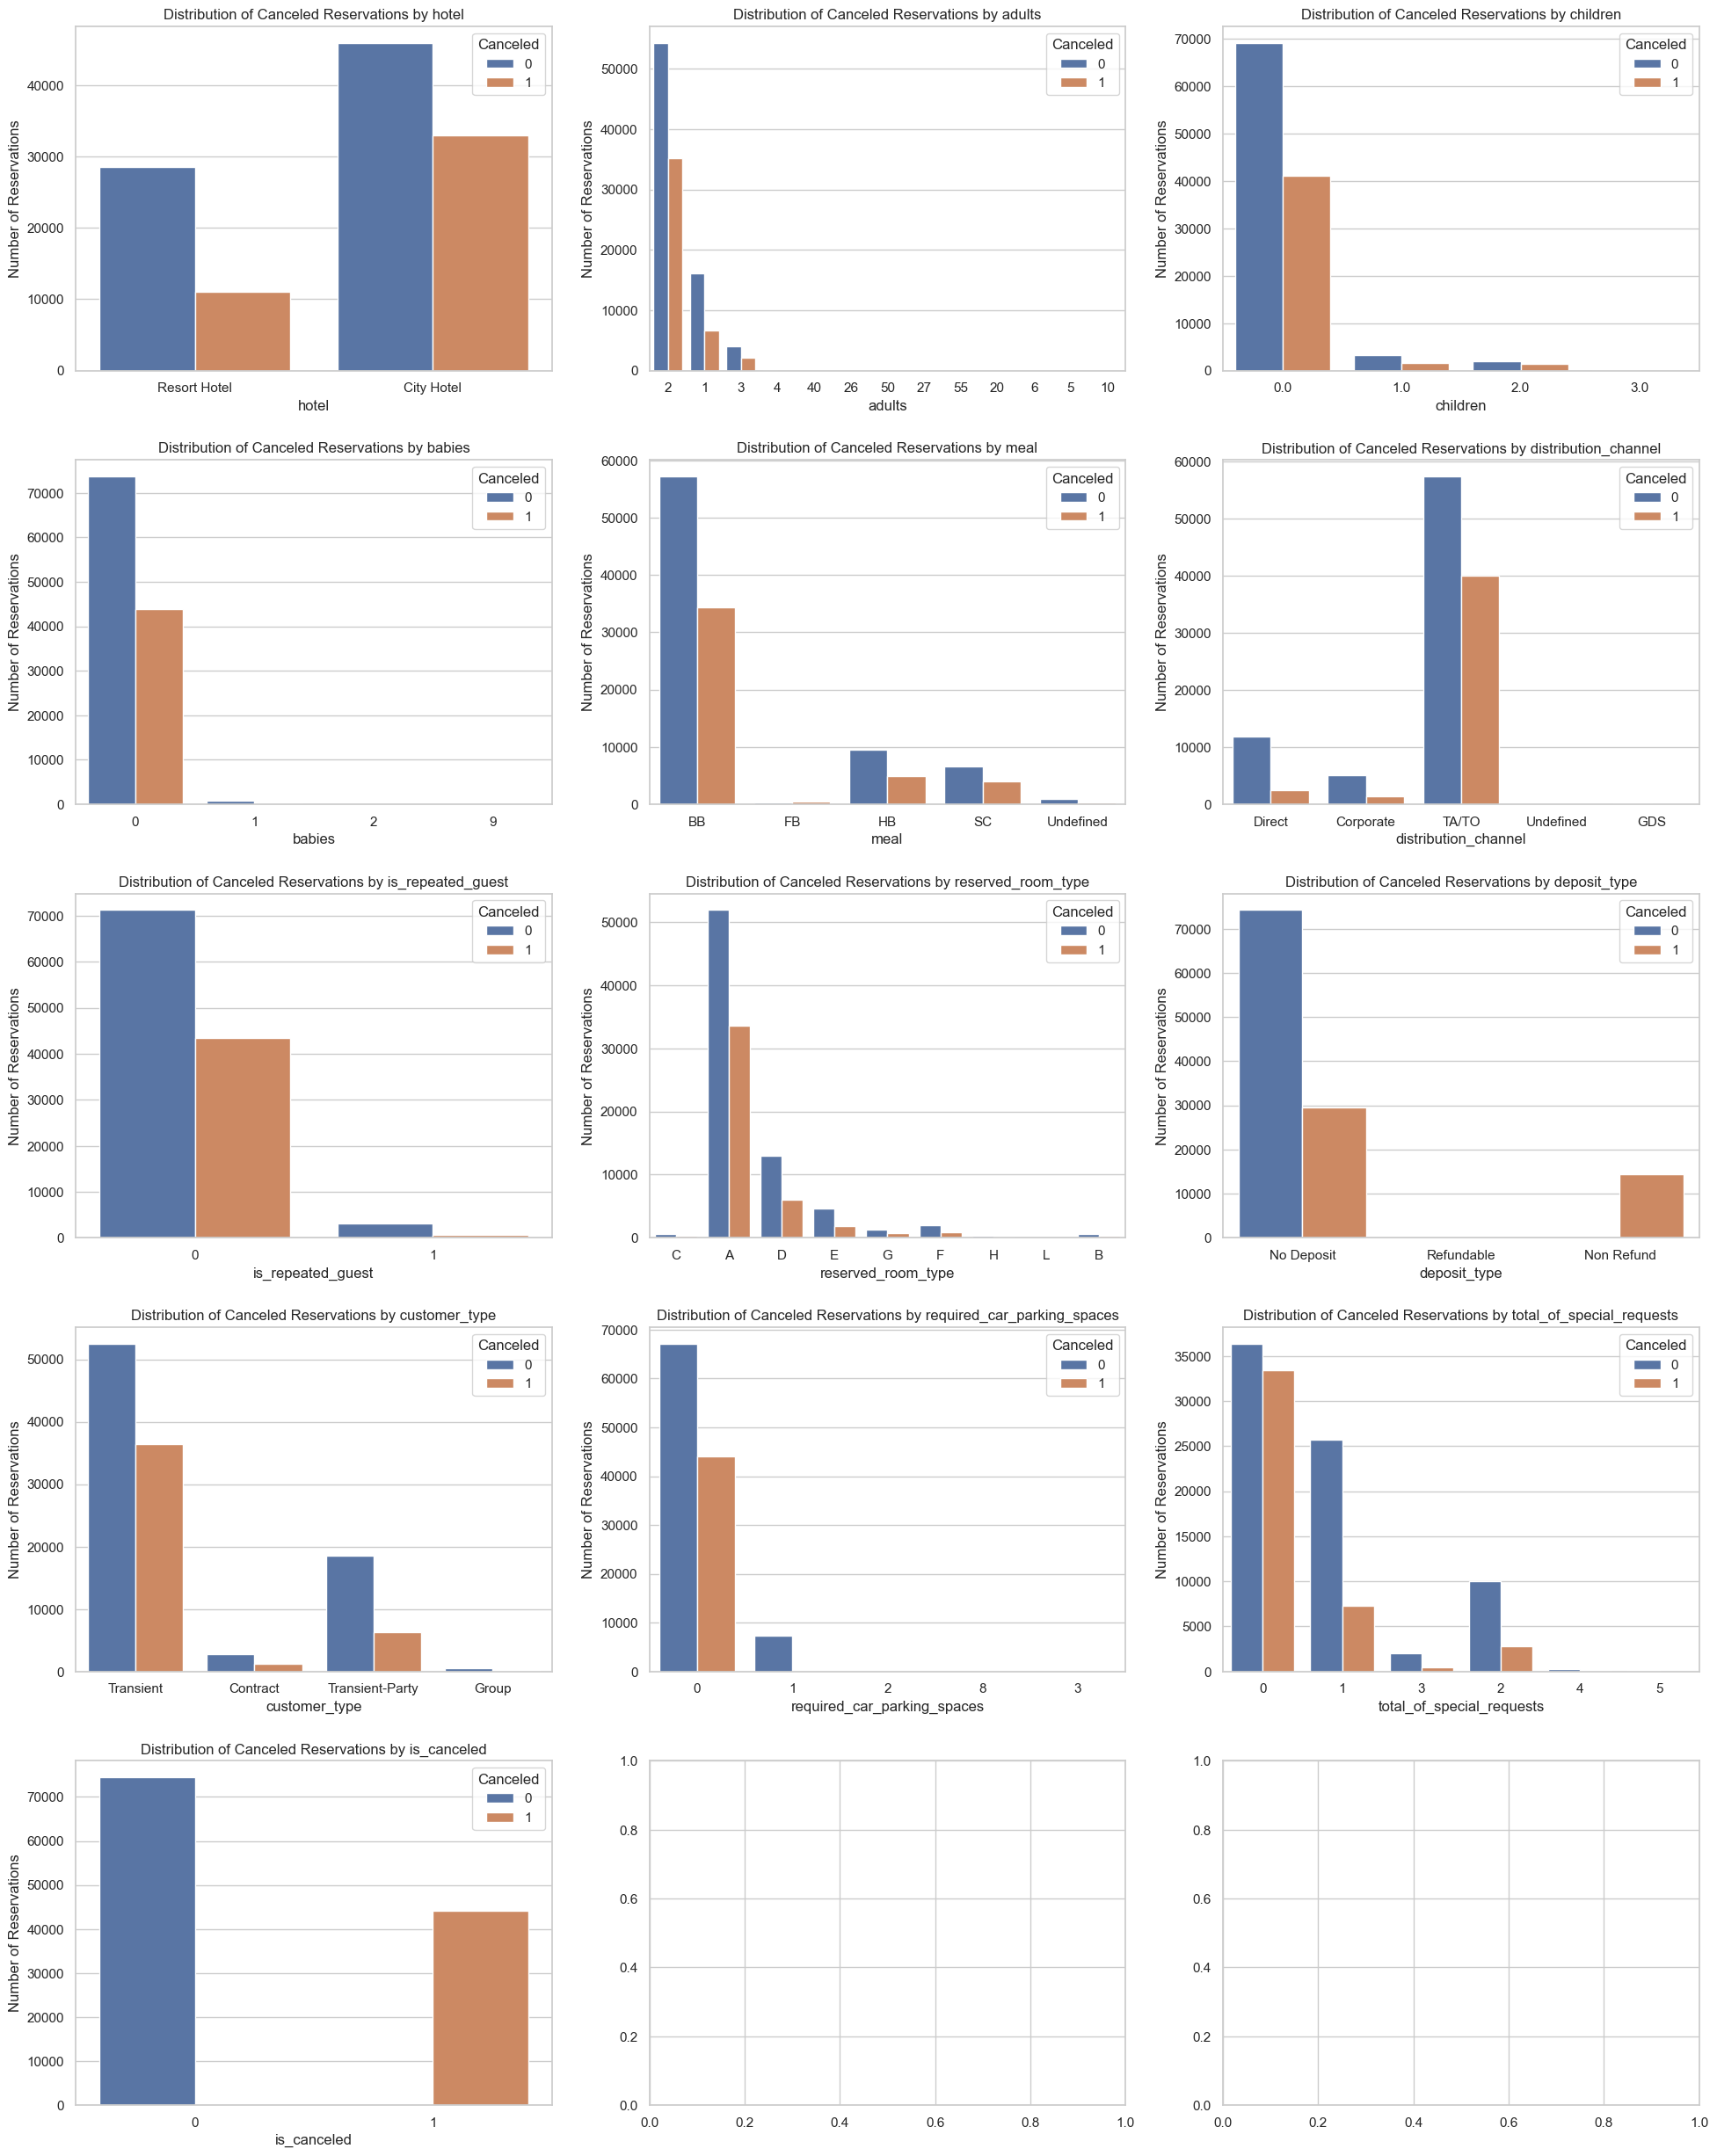

In [51]:
columns = [
    'hotel'
    ,'adults'
    ,'children'
    ,'babies'
    ,'meal'
    ,'distribution_channel'
    ,'is_repeated_guest' 
    ,'reserved_room_type' 
    ,'deposit_type' 
    ,'customer_type'
    ,'required_car_parking_spaces' 
    ,'total_of_special_requests'
    ,'is_canceled'
]

canceled_countplot(df[columns])

Given other distributions we have seen, these distributions aren't surprising anymore.

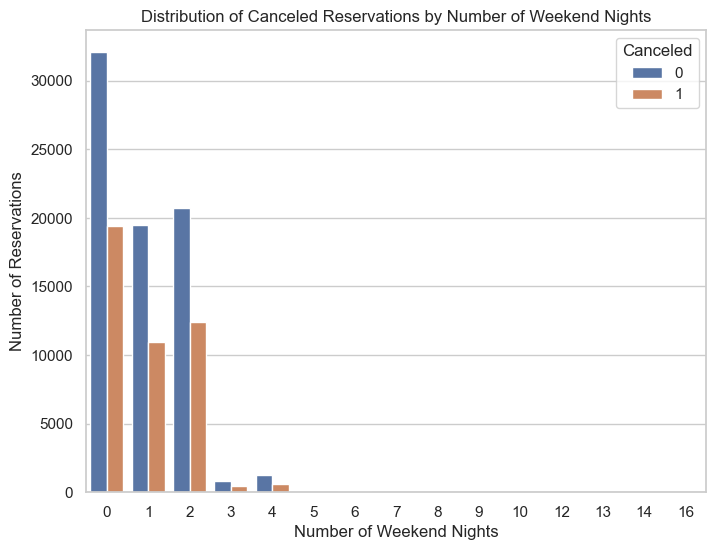

In [52]:
plt.figure(figsize=(8, 6))

sns.countplot(data=df, 
              x=df['stays_in_weekend_nights'], 
              hue=df['is_canceled'].astype(str))

plt.title('Distribution of Canceled Reservations by Number of Weekend Nights')
plt.xlabel('Number of Weekend Nights')
plt.ylabel('Number of Reservations')
plt.legend(title='Canceled')
plt.show()

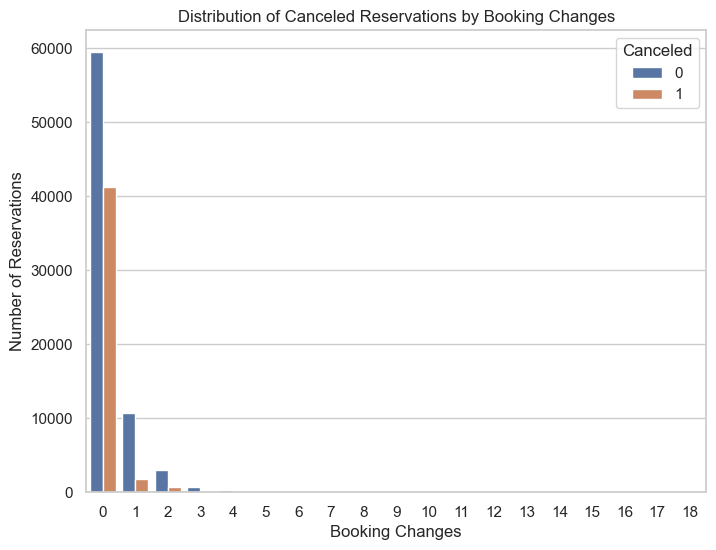

In [53]:
plt.figure(figsize=(8, 6))

sns.countplot(data=df, 
              x=df['booking_changes'], 
              hue=df['is_canceled'].astype(str))

plt.title('Distribution of Canceled Reservations by Booking Changes')
plt.xlabel('Booking Changes')
plt.ylabel('Number of Reservations')
plt.legend(title='Canceled')
plt.show()

## Outlier Data

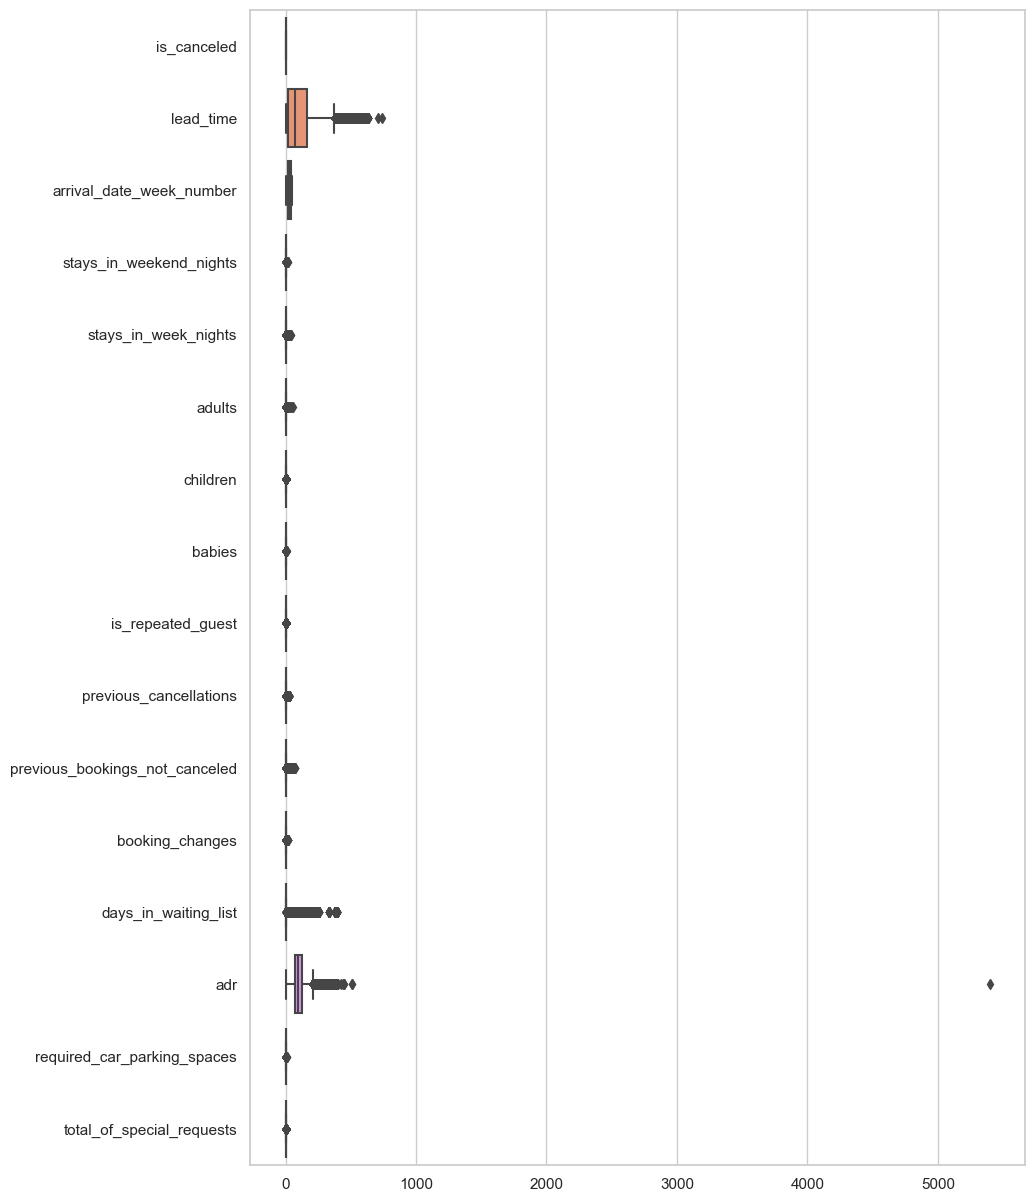

In [54]:
plt.figure(figsize = (10,15))
sns.boxplot(data=df, orient="h")
plt.show()

**adr** has a huge outlier, This outlier can be easily fixed.

# Functions

In [57]:
def load_data(dataset_path):
    df = pd.read_csv(dataset_path)
    return df

def clean_data(df):
    # remove duplicates
    #df.drop_duplicates(inplace=True)

    df["arrival_date_month"] = df["arrival_date_month"].replace({
        "January": 1, "February": 2, "March":3, "April": 4, "May": 5, "June": 6,
        "July": 7, "August": 8, "September": 9, "October": 10, "November": 11, "December": 12,})
    
    df = df.dropna(subset = 'country', axis = 0)
    
    conditions = [
    df['country'].isin(['PRT', 'GBR', 'ESP', 'IRL', 'FRA', 'ROU', 'NOR', 'POL', 'DEU', 'BEL', 'CHE', 'GRC', 'ITA', 'NLD', 'DNK', 'RUS', 'SWE', 'EST', 'CZE', 'FIN', 'LUX', 'SVN', 'ALB', 'UKR', 'SMR', 'LVA', 'SRB', 'AUT', 'BLR', 'LTU', 'TUR', 'HRV', 'AND', 'GIB', 'URY', 'JEY', 'GGY', 'SVK', 'HUN', 'BIH', 'BGR', 'CIV', 'MKD', 'ISL', 'MLT', 'IMN', 'LIE', 'MNE', 'FRO']),
    df['country'].isin(['USA', 'CAN', 'MEX', 'PRI', 'JAM', 'CYM', 'ZMB', 'KNA', 'TWN', 'GLP', 'BRB', 'DMA', 'PYF', 'ASM', 'UMI', 'VGB']),
    df['country'].isin(['ARG', 'BRA', 'CHL', 'URY', 'COL', 'VEN', 'SUR', 'ECU', 'PER', 'BOL', 'PRY', 'GUY']),
    df['country'].isin(['CHN', 'IND', 'KOR', 'HKG', 'IRN', 'ARE', 'GEO', 'ARM', 'ISR', 'PHL', 'SEN', 'IDN', 'JPN', 'KWT', 'MDV', 'THA', 'MYS', 'LKA', 'SGP', 'MMR', 'UZB', 'KAZ', 'BDI', 'SAU', 'VNM', 'TJK', 'PAK', 'IRQ', 'NPL', 'BGD', 'QAT', 'JAM', 'MAC', 'TGO', 'RWA', 'KHM', 'SYR', 'JAM', 'JEY']),
    df['country'].isin(['MOZ', 'MAR', 'AGO', 'ZAF', 'EGY', 'NGA', 'KEN', 'ZWE', 'DZA', 'TUN', 'CMR', 'CIV', 'COM', 'UGA', 'GAB', 'GNB', 'MRT', 'DJI', 'STP', 'KEN', 'TZA', 'SDN', 'LBR', 'LKA']),
    df['country'].isin(['AUS', 'FJI', 'NZL', 'PNG', 'PLW', 'NCL', 'KIR', 'FSM', 'SLB', 'NRU', 'TUV', 'TON', 'WSM', 'ASA', 'ATF', 'FJI'])
    ]

    choices = [
        'Europe',
        'North America',
        'South America',
        'Asia',
        'Africa',
        'Oceania'
    ]

    df['continent'] = np.select(conditions, choices, default='Others')
    
    conditions = [
        df['arrival_date_day_of_month'] < 11,
        df['arrival_date_day_of_month'] < 21
    ]

    choices = [
        'BoM', #Beginning of Month
        'MoM', #Middle of Month
    ]

    df['arrival_date_day_of_month']  = np.select(conditions, choices, default='EoM') #End of Month

    columns_to_drop = ["reservation_status", 'reservation_status_date', 'agent', 
                       'company', 'country', 'assigned_room_type', 'arrival_date_year'
                      ]
    df.drop(columns_to_drop, axis=1, inplace=True)
    
    df['adr'] = np.where(
        df['adr'] < 0, 
        df['adr'].median(), 
        df['adr']
    )

    df['children'] = df['children'].fillna(0)
    
    df['adults'] = np.where(df['adults'] <= 0,
                             2, #median of adults
                            df['adults'])
    df['children'] = np.where(df['children'] >= 10,
                             0, #median of children
                            df['children'])
    df['babies'] = np.where(df['babies'] >= 10,
                            0, #median of babies
                            df['babies'])
    df['adr'] = np.where(df['adr'] >= 5000,
                            95, #median of adr
                            df['adr'])
    
    object_features = [col for col in df.columns if pd.api.types.is_object_dtype(df[col])]
    df = pd.get_dummies(df, columns=object_features, drop_first=True)
    
    #columns_to_drop_2 = [
    #                     'arrival_date_day_of_month_MoM'
    #                    ,'meal_SC'
    #                    ,'reserved_room_type_G'
    #                    ,'reserved_room_type_L'
    #                    ,'stays_in_weekend_nights'
    #                    ,'children']
    #df.drop(columns_to_drop_2, axis=1, inplace=True)
    # reset index
    df = df[['is_canceled', 'lead_time', 'arrival_date_month',
       'arrival_date_week_number', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'hotel_Resort Hotel',
       'arrival_date_day_of_month_EoM', 'arrival_date_day_of_month_MoM',
       'meal_FB', 'meal_HB', 'meal_SC', 'meal_Undefined',
       'market_segment_Complementary', 'market_segment_Corporate',
       'market_segment_Direct', 'market_segment_Groups',
       'market_segment_Offline TA/TO', 'market_segment_Online TA',
       'distribution_channel_Direct', 'distribution_channel_GDS',
       'distribution_channel_TA/TO', 'distribution_channel_Undefined',
       'reserved_room_type_B', 'reserved_room_type_C', 'reserved_room_type_D',
       'reserved_room_type_E', 'reserved_room_type_F', 'reserved_room_type_G',
       'reserved_room_type_H', 'reserved_room_type_L',
       'deposit_type_Non Refund', 'deposit_type_Refundable',
       'customer_type_Group', 'customer_type_Transient',
       'customer_type_Transient-Party', 'continent_Asia', 'continent_Europe',
       'continent_North America', 'continent_Oceania', 'continent_Others',
       'continent_South America']]

    df.reset_index(inplace=True, drop=True)

    return df

In [33]:
def remove_outliers_zscore(df, z_threshold=3):
    # Calculate z-scores for all numeric columns in the DataFrame
    z_scores = np.abs(stats.zscore(df.select_dtypes(include=np.number)))
    
    # Find indices of outliers based on z-scores
    outlier_indices = np.where(z_scores > z_threshold)
    
    # Remove rows containing outliers based on z-scores
    df_cleaned = df[(z_scores <= z_threshold).all(axis=1)]
    
    return df_cleaned

In [34]:
def imputer(X_train,X_test):
    imputer = KNNImputer(n_neighbors=3)
    X_train = imputer.fit_transform(X_train)
    X_test = imputer.transform(X_test)
    return X_train, X_test

In [35]:
def scaler(X_train,X_test):
    sts = StandardScaler()
    X_train = sts.fit_transform(X_train)
    X_test = sts.transform(X_test)
    return X_train, X_test

In [36]:
def tune_clf_hyperparameters(clf, param_grid, X_train, y_train, scoring='f1', n_splits=5):
    
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=101)

    clf_grid = GridSearchCV(clf, param_grid, cv=cv, scoring=scoring, n_jobs=-1)

    clf_grid.fit(X_train, y_train)

    best_hyperparameters = clf_grid.best_params_
    
    return clf_grid.best_estimator_, best_hyperparameters

In [37]:
def metrics_calculator(clf, X_test, y_test, model_name):

    y_pred = clf.predict(X_test)
    result = pd.DataFrame(data=[accuracy_score(y_test, y_pred),
                                precision_score(y_test, y_pred, pos_label=1),
                                recall_score(y_test, y_pred, pos_label=1),
                                f1_score(y_test, y_pred, pos_label=1),
                                roc_auc_score(y_test, clf.predict_proba(X_test)[:,1]),
                                clf.max_depth],
                          index=['Accuracy','Precision (Class 1)','Recall (Class 1)',
                                 'F1-score (Class 1)','AUC (Class 1)','Max Depth'],
                          columns = [model_name])
                                
    return result

In [38]:
def model_evaluation(clf, X_train, X_test, y_train, y_test, model_name):
    
    sns.set(font_scale=1.2)
    
    #classification report for training set
    y_pred_train = clf.predict(X_train)
    print("\n\t  Classification report for training set")
    print("-"*55)
    print(classification_report(y_train, y_pred_train))

    #classification report for test set
    y_pred_test = clf.predict(X_test)
    print("\n\t   Classification report for test set")
    print("-"*55)
    print(classification_report(y_test, y_pred_test))
     
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5), dpi=100, gridspec_kw={'width_ratios': [2, 2, 1]})

    #plot confusion matrix for test
    ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, colorbar=False, ax=ax1)
    ax1.set_title('Confusion Matrix for Test Data')                                     
    ax1.grid(False)
    
    #plot ROC_AUC
    RocCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax2)
    ax2.set_xlabel('False Positive Rate')
    ax2.set_ylabel('True Positive Rate')
    ax2.set_title('ROC Curve for Test Data (Positive label: 1)')
    
    #report the results
    result = metrics_calculator(clf, X_test, y_test, model_name)
    table = ax3.table(cellText=result.values, colLabels=result.columns, rowLabels=result.index, loc='center')
    table.scale(0.6, 2)
    table.set_fontsize(12)
    ax3.axis('tight')
    ax3.axis('off')
    plt.tight_layout()
    plt.show() 

# Modelling

## Train Test Validation Split

In [58]:
df = clean_data(load_data('hotel_bookings.csv'))

In [59]:
X = df.drop("is_canceled", axis=1)
y = df["is_canceled"]
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size = 0.3, random_state=101,stratify=y)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.1, random_state=101,stratify=y_temp)

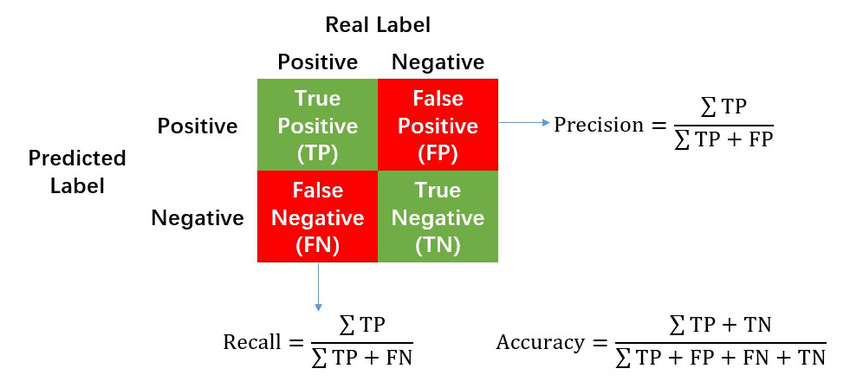

Both false positives (a booking is predicted as canceled, but it is not) and false negatives (a booking is predicted as not canceled, but it is) could be costly for the hotel.

False negatives may be more costly because the hotel might lose potential customers by overbooking rooms, expecting some cancellations that do not happen. Therefore, it is important to minimize false negatives, which means maximizing recall for the 'canceled' class (1).

Precision is also important because it minimizes false positives, which means minimizing the cases where the model predicts a cancellation, but the guest actually arrives. This could lead to overbooking and unsatisfied customers.

The F1-score, which is the harmonic mean of precision and recall, would be a good metric to use as it balances both precision and recall.

## Decision Tree

In [49]:
dt_base = DecisionTreeClassifier(random_state=101)

In [50]:
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [13, 14, 15],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3],
    'class_weight': [{0: 1, 1: w} for w in [1, 2, 3]]
}

In [60]:
best_dt, best_dt_hyperparams = tune_clf_hyperparameters(dt_base, param_grid_dt, X_train, y_train)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [196]:
print('DT Optimal Hyperparameters: \n', best_dt_hyperparams)

DT Optimal Hyperparameters: 
 {'class_weight': {0: 1, 1: 2}, 'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}



	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.83      0.86     52321
           1       0.74      0.83      0.79     30910

    accuracy                           0.83     83231
   macro avg       0.82      0.83      0.82     83231
weighted avg       0.84      0.83      0.83     83231


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.80      0.84     20181
           1       0.71      0.80      0.75     11922

    accuracy                           0.80     32103
   macro avg       0.79      0.80      0.79     32103
weighted avg       0.81      0.80      0.80     32103



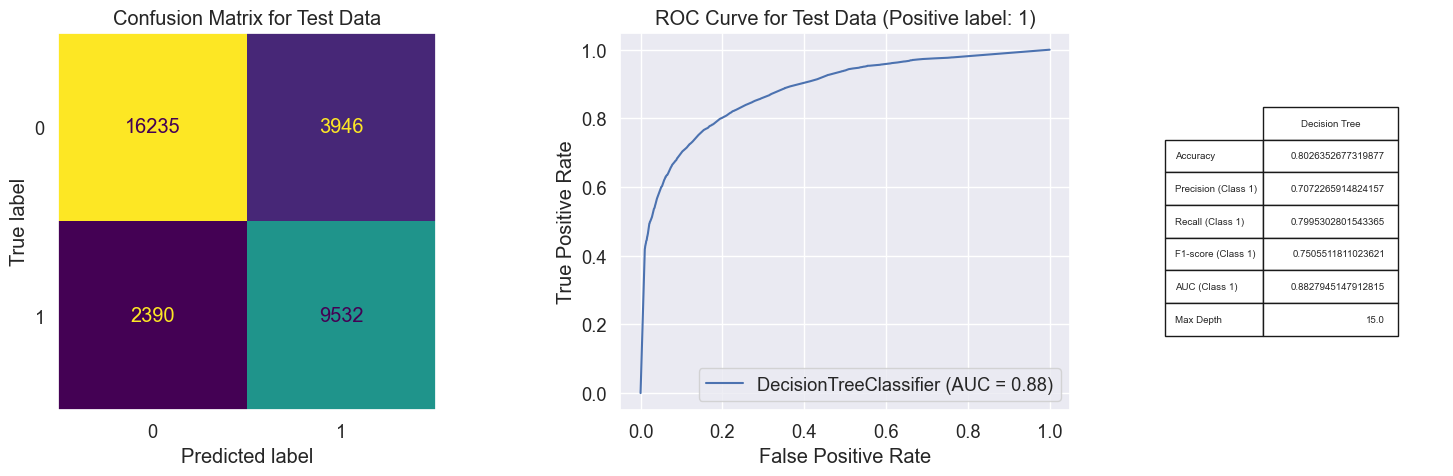

In [61]:
model_evaluation(best_dt, X_train, X_test, y_train, y_test, 'Decision Tree')

 - The **Accuracy** is around 80%, which means the model is correctly predicting whether a booking will be canceled or not about 80% of the time 
- The **Precision** for class 1 (cancellations) is around 71%, which means that 71% of the bookings that the model predicted as canceled were actually canceled.

 - The **Recall** for class 1 is  around 80%, which means that the model correctly identified 80% of the actual cancellations.

 - The **F1-score** for class 1 is 75%, which is the harmonic mean of Precision and Recall.

 - The **AUC** (Area Under the ROC Curve) for class 1 is around 88%, which means that the model has a good discriminative power between the two classes.

The confusion matrix shows that there are still some False Positives and False Negatives, but the model is doing a relatively good job of minimizing them.

The model is not overfitting, as the metric values for the test and train sets are close together, meaning that the model is generalizing well to unseen data.

Overall, this model is performing well on the test data and seems to be a good model for predicting cancellations, although there is room for improvement.

In [62]:
dt_result = metrics_calculator(best_dt, X_test, y_test, 'Decision Tree')
dt_result

,Decision Tree
Accuracy,0.802635
Precision (Class 1),0.707227
Recall (Class 1),0.799530
F1-score (Class 1),0.750551
AUC (Class 1),0.882795
Max Depth,15.000000


## Random Forest

In [63]:
rf_base = RandomForestClassifier(random_state=101, n_jobs=-1)

In [64]:
param_grid_rf = {
    'n_estimators': [100, 150],
    'criterion': ['entropy'],
    'max_depth': [16, 18],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3],
    'class_weight': [{0: 1, 1: w} for w in [1, 2, 3]]
}

In [65]:
best_rf, best_rf_hyperparams = tune_clf_hyperparameters(rf_base, param_grid_rf, X_train, y_train)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [202]:
print('RF Optimal Hyperparameters: \n', best_rf_hyperparams)

RF Optimal Hyperparameters: 
 {'class_weight': {0: 1, 1: 2}, 'criterion': 'entropy', 'max_depth': 18, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 150}



	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.88      0.90     52321
           1       0.81      0.86      0.83     30910

    accuracy                           0.87     83231
   macro avg       0.86      0.87      0.87     83231
weighted avg       0.87      0.87      0.87     83231


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.86      0.87     20181
           1       0.78      0.80      0.79     11922

    accuracy                           0.84     32103
   macro avg       0.83      0.83      0.83     32103
weighted avg       0.84      0.84      0.84     32103



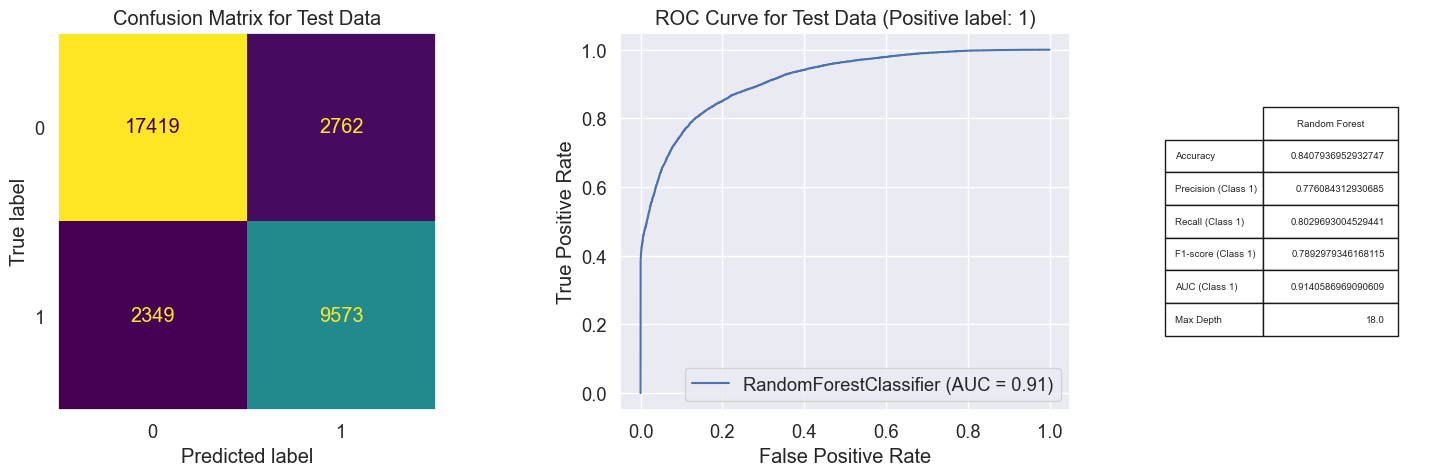

In [66]:
model_evaluation(best_rf, X_train, X_test, y_train, y_test, 'Random Forest')

 - The **Accuracy** of this model is better and is around 84%, which means the model is correctly predicting whether a booking will be canceled or not about 84% of the time.

 - The **Precision** for class 1 (cancellations) also improved and now is 78%, which means that approximately 78% of the bookings that the model predicted as canceled were actually canceled.

 - The **Recall** for class 1 is 80%, which means that the model correctly identified approximately 80% of the actual cancellations.

 - The **F1-score** for class 1 is 79%, which is the harmonic mean of Precision and Recall.

 - The **AUC** (Area Under the ROC Curve) for class 1 is 91%, which means that the model has a very good discriminative power between the two classes.

The confusion matrix shows that there are some False Positives and False Negatives, but the model is doing a good job of minimizing them.

This model also does not overfitt, as the metric values for the test and train sets are close together, indicating that the model is generalizing well to unseen data.

Compared to the Decision Tree (DT) model, the Random Forest (RF) model shows a significant improvement in all the performance metrics, particularly in reducing the number of False Positives. This indicates that the Random Forest model is better at balancing the trade-off between Precision and Recall, leading to a higher F1-score. Additionally, the RF model is dxeeper, having max depth of 18 compared to DT's 15, making it more complex.

Overall, this model is performing well on the test data and seems to be a good model for predicting cancellations, although there is still room for improvement, particularly in reducing the number of False Negatives.

In [67]:
rf_result = metrics_calculator(best_rf, X_test, y_test, 'Random Forest')
rf_result

,Random Forest
Accuracy,0.840794
Precision (Class 1),0.776084
Recall (Class 1),0.802969
F1-score (Class 1),0.789298
AUC (Class 1),0.914059
Max Depth,18.000000


## XGBoost

In [68]:
xgb_base = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=101)

In [69]:
param_grid_xgb = {
    'n_estimators': [250, 350],
    'learning_rate': [0.01, 0.1],
    'max_depth': [7, 8],
    'subsample': [0.7, 0.8],
    'colsample_bytree': [0.8, 0.9],
    'scale_pos_weight': [1, (y_train == 0).sum() / (y_train == 1).sum()]
}

In [70]:
best_xgb, best_xgb_hyperparams = tune_clf_hyperparameters(xgb_base, param_grid_xgb, X_train, y_train)
print('XGBoost Optimal Hyperparameters: \n', best_xgb_hyperparams)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

XGBoost Optimal Hyperparameters: 
 {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 350, 'scale_pos_weight': 1.692688450339696, 'subsample': 0.7}



	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.91      0.92     52321
           1       0.86      0.89      0.87     30910

    accuracy                           0.90     83231
   macro avg       0.90      0.90      0.90     83231
weighted avg       0.91      0.90      0.91     83231


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.88      0.88     20181
           1       0.79      0.80      0.80     11922

    accuracy                           0.85     32103
   macro avg       0.84      0.84      0.84     32103
weighted avg       0.85      0.85      0.85     32103



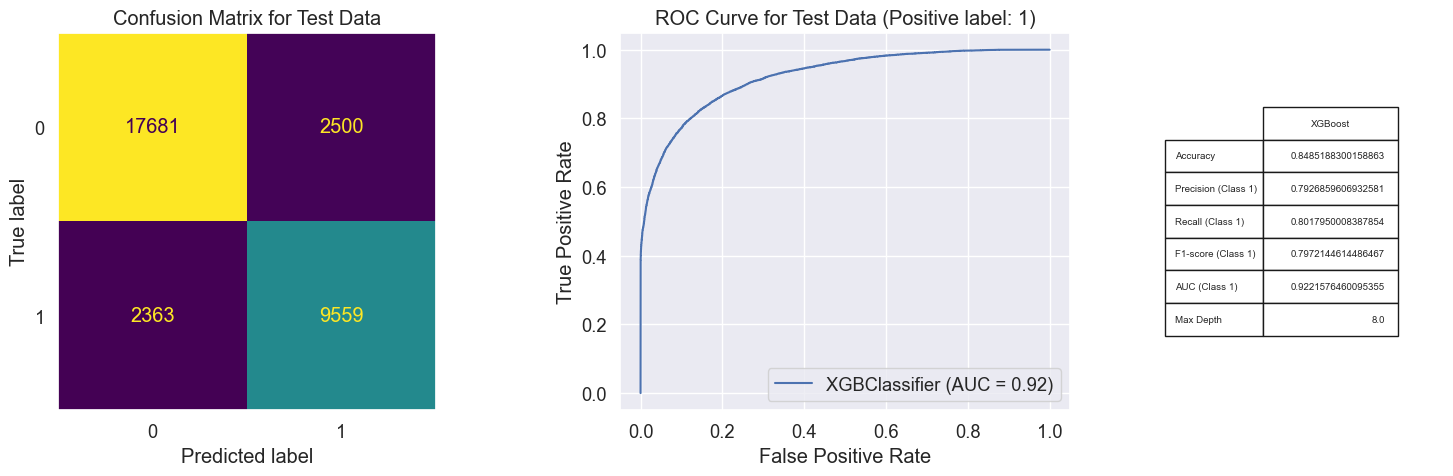

In [71]:
model_evaluation(best_xgb, X_train, X_test, y_train, y_test, 'XGBoost')

 - The **Accuracy** is 85%, which means the model is correctly predicting whether a booking will be canceled or not about 85% of the time.

 - The **Precision** for class 1 (cancellations) is 79%, which means that approximately 79% of the bookings that the model predicted as canceled were actually canceled.

 - The **Recall** for class 1 is 80%, which means that the model correctly identified approximately 80% of the actual cancellations.

 - The **F1-score** for class 1 is 79%, which is the harmonic mean of Precision and Recall.

 - The **AUC** (Area Under the ROC Curve) for class 1 is 92%, which means that the model has a very good discriminative power between the two classes.

The model is not overfitting, as the metric values for the test and train sets are close together, indicating that the model is generalizing well to unseen data.

Compared to the Random Forest model, the XGBoost model shows a slight improvement in all the performance metrics. Although the improvement is not significant, it is still better at balancing the trade-off between Precision and Recall, leading to a higher F1-score. This indicates that the XGBoost model is a better model for predicting cancellations. Aditionally, it has the least complexity, the XGB model has max depth of 8.

Overall, this model is performing well on the test data and seems to be a good model for predicting cancellations.

In [72]:
xgb_result = metrics_calculator(best_xgb, X_test, y_test, 'XGBoost')
xgb_result

,XGBoost
Accuracy,0.848519
Precision (Class 1),0.792686
Recall (Class 1),0.801795
F1-score (Class 1),0.797214
AUC (Class 1),0.922158
Max Depth,8.000000


In [73]:
results = pd.concat([dt_result, rf_result, xgb_result], axis=1).T
results.sort_values(by='F1-score (Class 1)', ascending=False, inplace=True)
results

,Accuracy,Precision (Class 1),Recall (Class 1),F1-score (Class 1),AUC (Class 1),Max Depth
XGBoost,0.848519,0.792686,0.801795,0.797214,0.922158,8.0
Random Forest,0.840794,0.776084,0.802969,0.789298,0.914059,18.0
Decision Tree,0.802635,0.707227,0.799530,0.750551,0.882795,15.0


It is clear that the XGBoost model has the best performance, it is also less complex, having a max depth of 8. 

Thus the XGBoost classifier will be our model of choice.

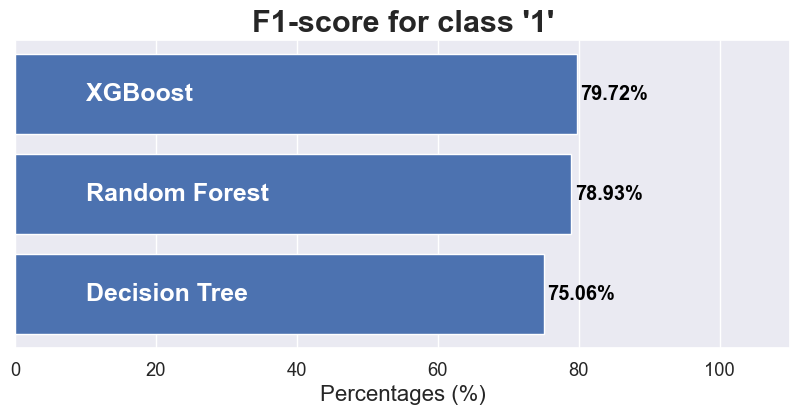

In [74]:
results.sort_values(by='F1-score (Class 1)', ascending=True, inplace=True)
f1_scores = round((results['F1-score (Class 1)']*100).astype(float),2)

fig, ax = plt.subplots(figsize=(10, 4))
ax.barh(results.index, f1_scores)

# Annotate the values and indexes
for i, (value, name) in enumerate(zip(f1_scores, results.index)):
    ax.text(value+0.5, i, f"{value}%", ha='left', va='center', fontweight='bold', color='black')
    ax.text(10, i, name, ha='left', va='center', fontweight='bold', color='white', fontsize=18)

ax.set_yticks([])
ax.set_xlim([0,110])

plt.title("F1-score for class '1'", fontweight='bold', fontsize=22)
plt.xlabel('Percentages (%)', fontsize=16)
plt.show()

## Model Explainability

**XGBoost** had the best performance, and thus will be our final model.  

In this part we will look at feature importance and use SHAP (SHapley Additive exPlanations) to explain how the model makes decisions.

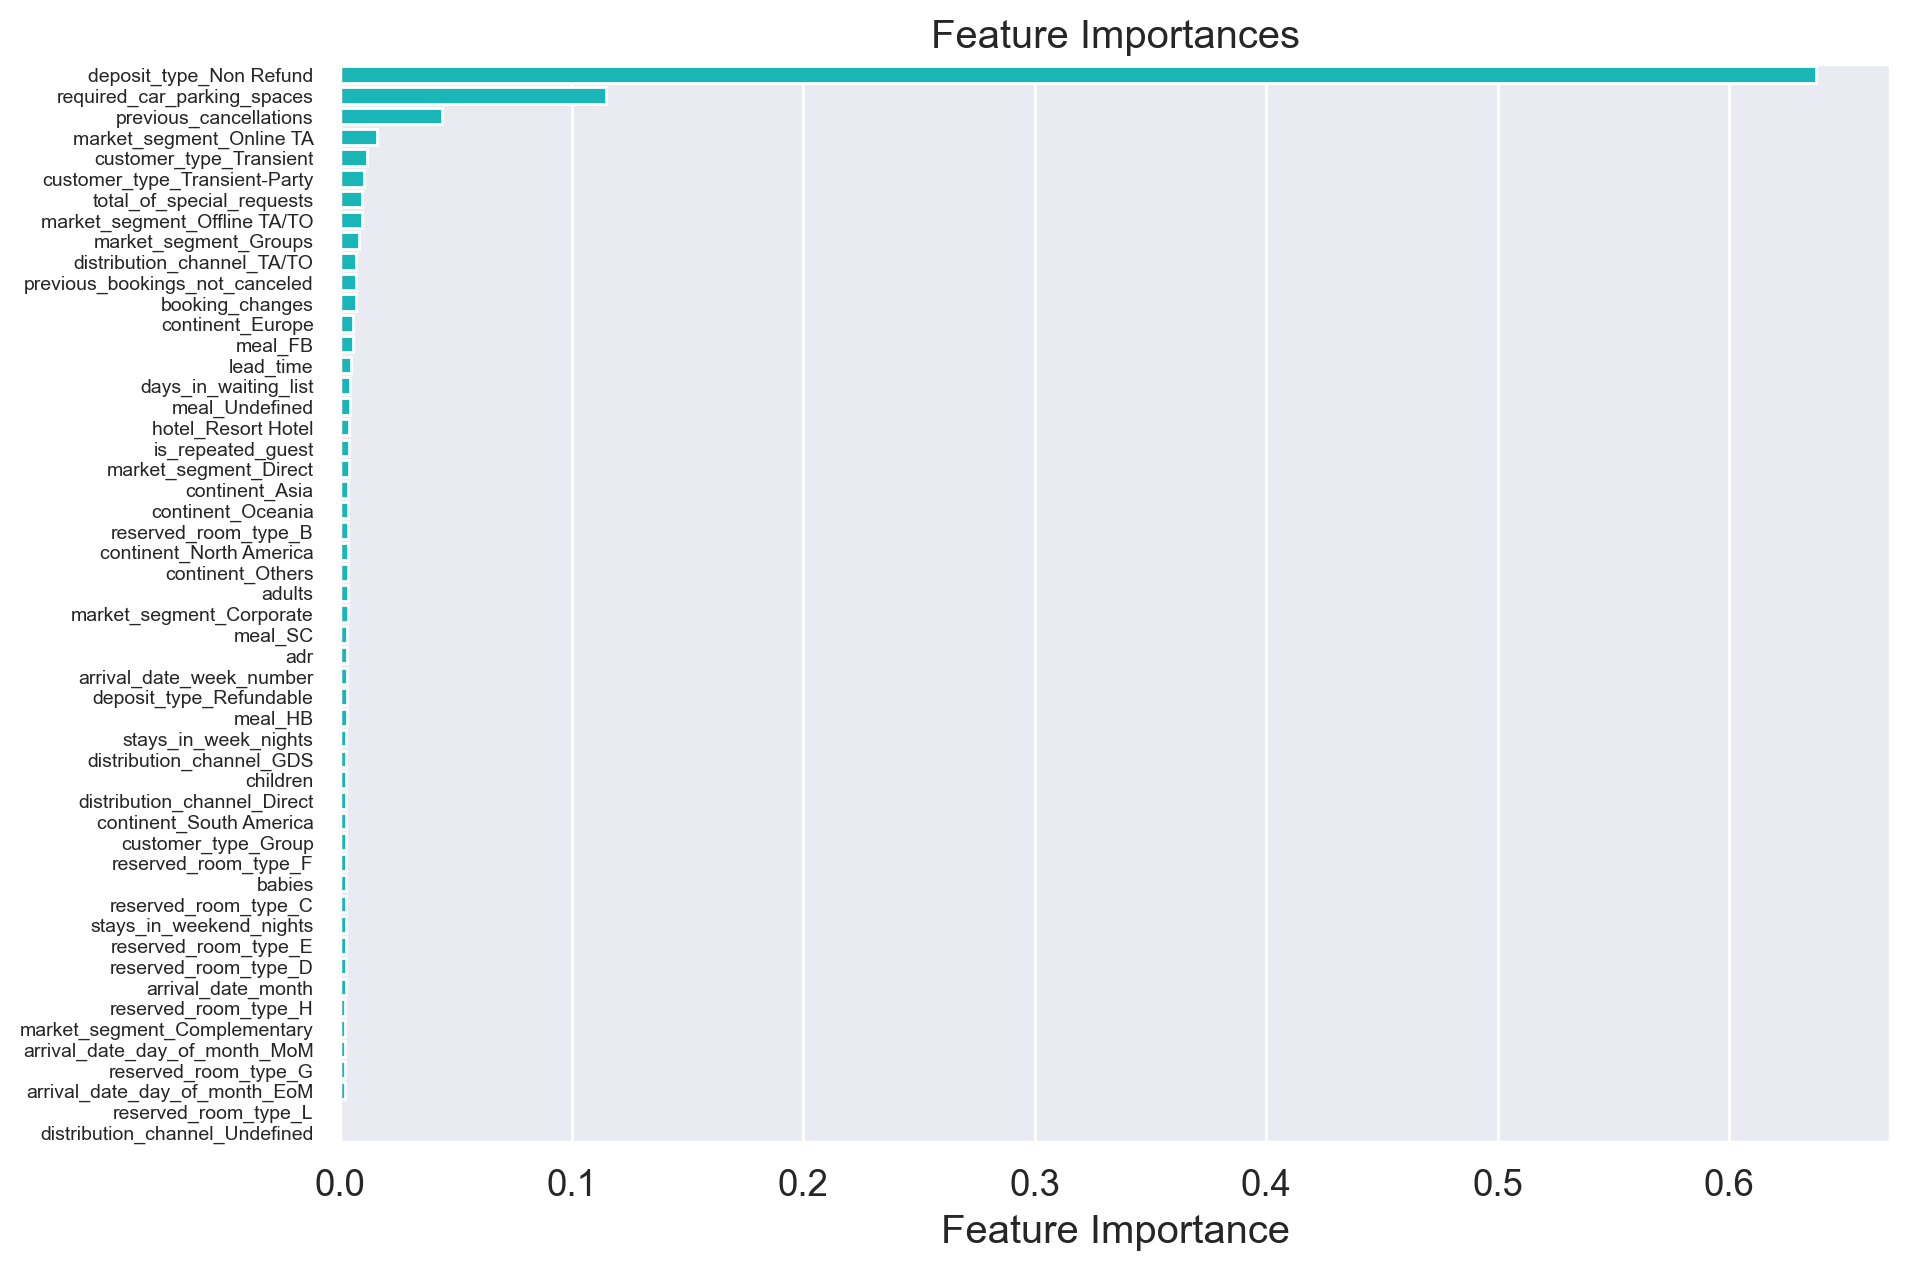

In [75]:
feature_importances = best_xgb.feature_importances_

sorted_indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 7), dpi=200)
sns.barplot(x=feature_importances[sorted_indices], y=X.columns[sorted_indices], color='darkturquoise')
plt.xlabel('Feature Importance')
plt.title('Feature Importances')
plt.yticks(fontsize=7)
plt.show()

The model has found that features related to the **deposit type Non Refund**, **previous cancellations**, **car parking requirements**, **Online TA market segment**, and **Transient Party customer type** are the most important features for predicting cancellations.

## Shapley Values

Shapely values are a common way of getting a consistent and objective explanation of how each feature impacts the model's prediction.

The Shapley value is the (weighted) average of marginal contributions. Features with positive Shapely values positively impact the prediction, while those with negative values have a negative impact. The magnitude is a measure of how strong the effect is.

In [253]:
explainer = shap.TreeExplainer(best_xgb)
shap_values = explainer.shap_values(X_test)

In [157]:
print('class of 5th row:',y_test.iloc[5])
shap.force_plot(explainer.expected_value, shap_values[5, :], X_test.iloc[5, :])

class of 5th row: 1


Here we took a random user who has canceled the booking and we inspect which features influence the model in predicting.  

We see that **Online TA market segment**, **adr** and **lead** time positively influence the probability of the booking being canceled, while **total_of_special_requests**, **Non Refund deposit_type** negatively influence the probability

Now let's take a look at a similar graph but for the first 100 samples

In [262]:
shap.plots.force(explainer.expected_value, shap_values[:100],features=X.columns)

In [325]:
shap.plots.force(explainer.expected_value, shap_values[65],features=X.columns)

If we take a look at the 65th sample, (which is at the position 92 in the upper graph), we see how some features affect the probability of cancelling the booking.

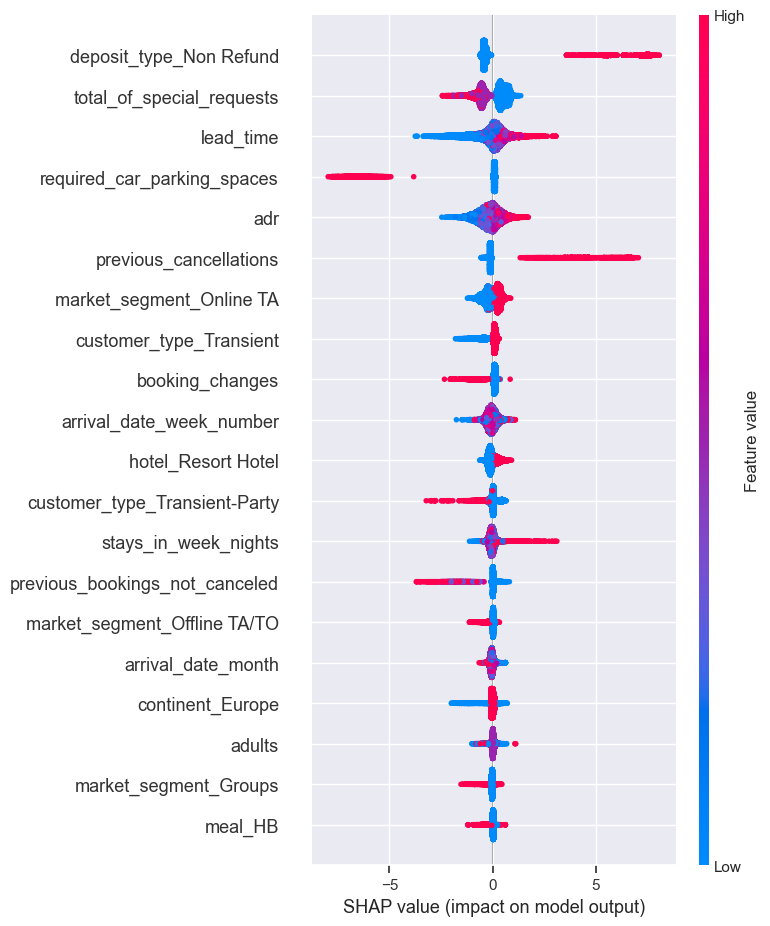

In [138]:
shap.summary_plot(shap_values, X_test)

Here we see the SHAP values (how the variable impacts the model output) of the features depending on the value of the variable. 

For example here we see that when Non Refund deposit type value is high, it has a high impact on the models output. 

In [294]:
print('='*115)

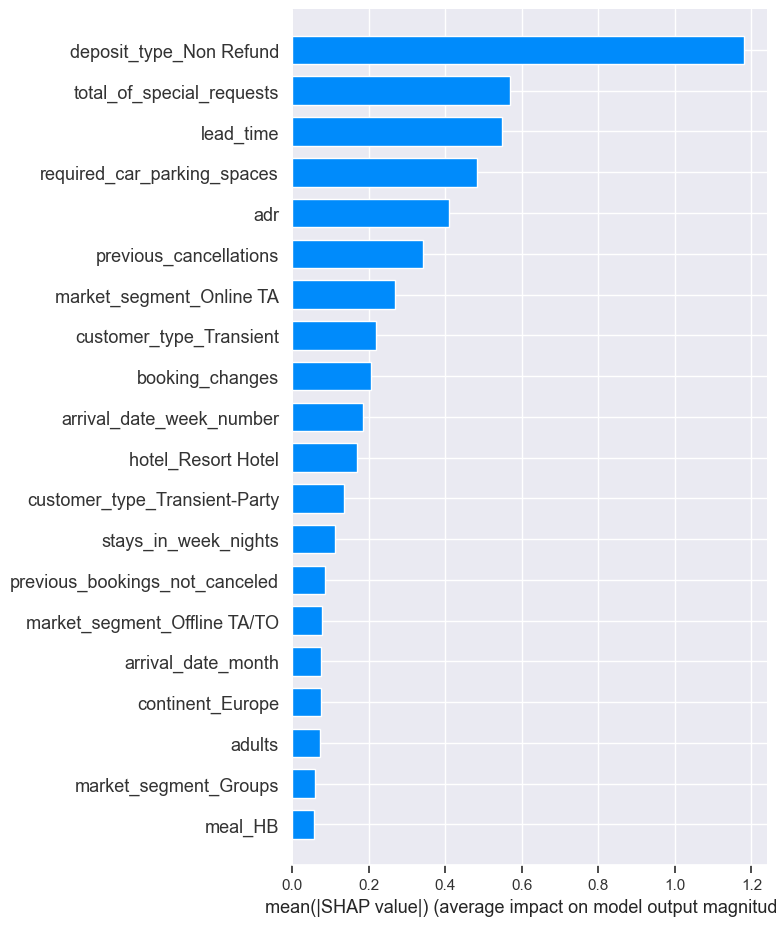

In [146]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

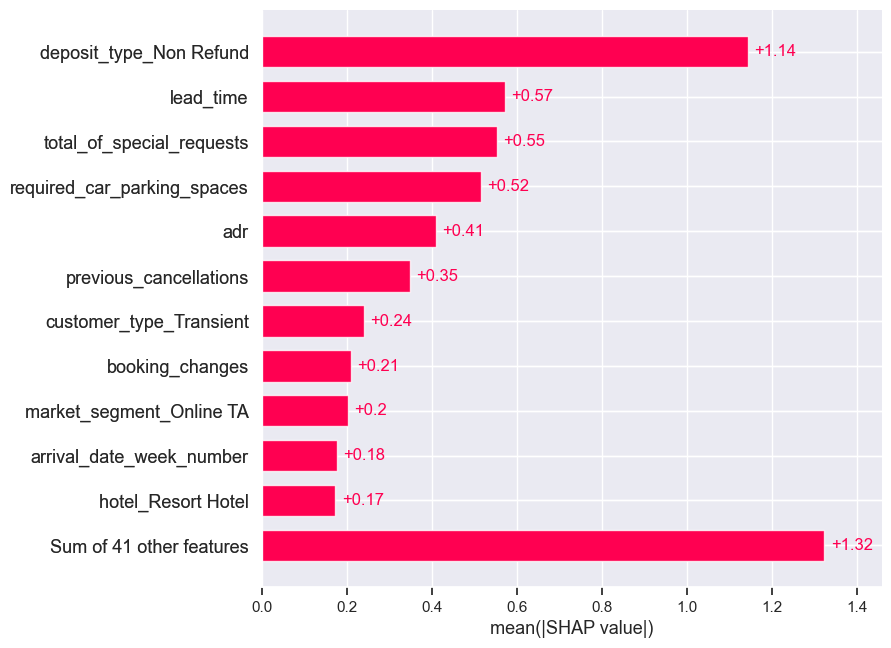

In [273]:
shap.plots.bar(shap_values_1, max_display=12)

The SHAP bar plot is a powerful visualization tool that provides insights into the importance of each feature in an ML model. Here for example we see how each variable affects the model output.

In [293]:
print('='*115)

Each dot is a single prediction (row) from the dataset.

 * The x-axis is the value of the feature (from the X matrix).

 * The y-axis is the SHAP value for that feature, which represents how much knowing that feature’s value changes the output of the model for that sample’s prediction.

 * The color corresponds to a second feature that may have an interaction effect with the feature we are plotting (by default this second feature is chosen automatically).

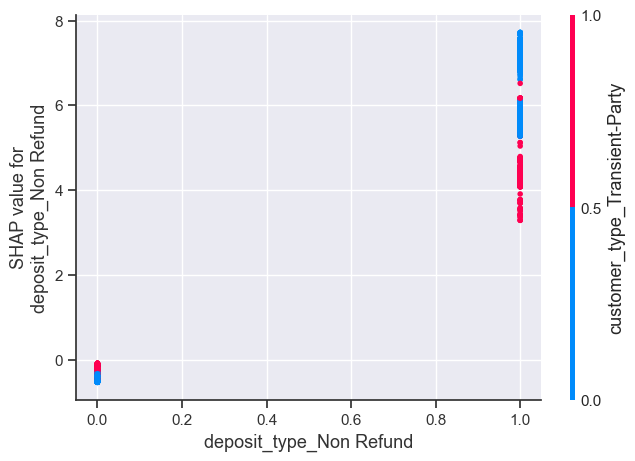

In [282]:
shap.dependence_plot('deposit_type_Non Refund', shap_values, X_test)

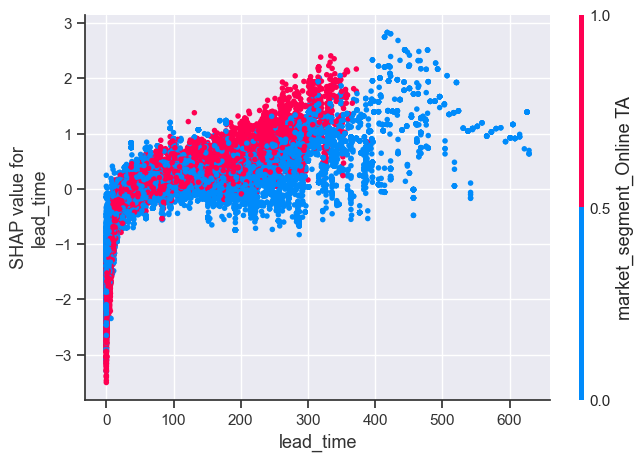

In [284]:
shap.dependence_plot('lead_time', shap_values, X_test)

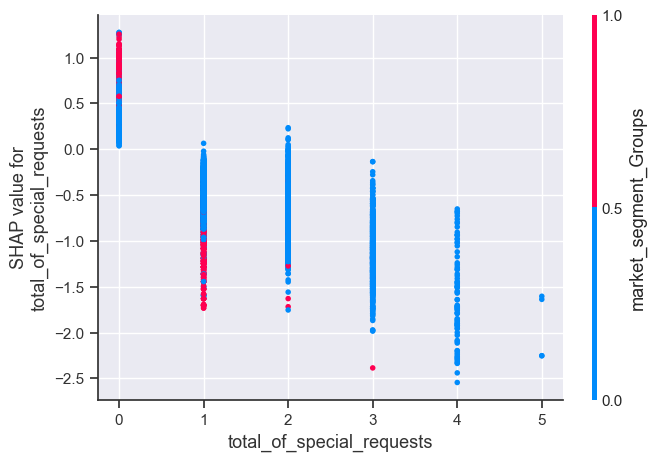

In [285]:
shap.dependence_plot('total_of_special_requests', shap_values, X_test)

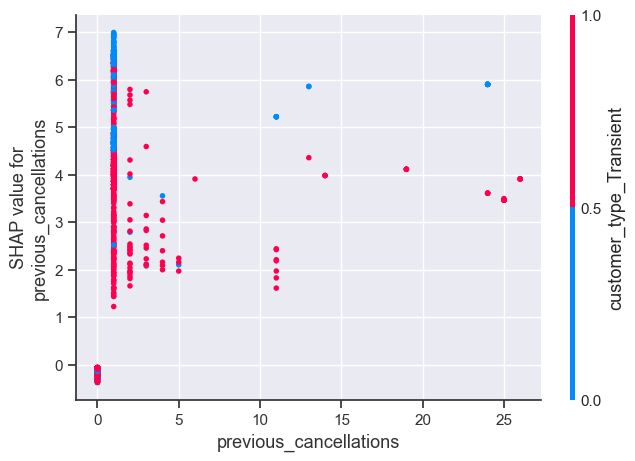

In [286]:
shap.dependence_plot('previous_cancellations', shap_values, X_test)

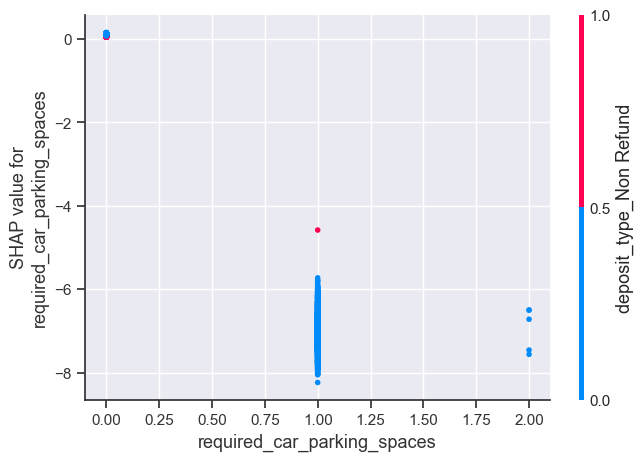

In [287]:
shap.dependence_plot('required_car_parking_spaces', shap_values, X_test)

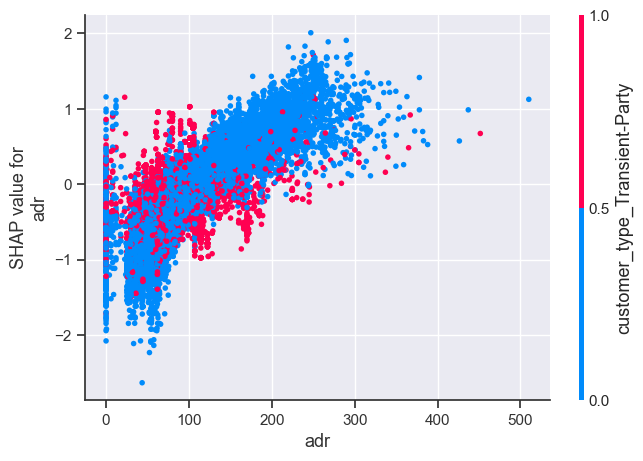

In [288]:
shap.dependence_plot('adr', shap_values, X_test)

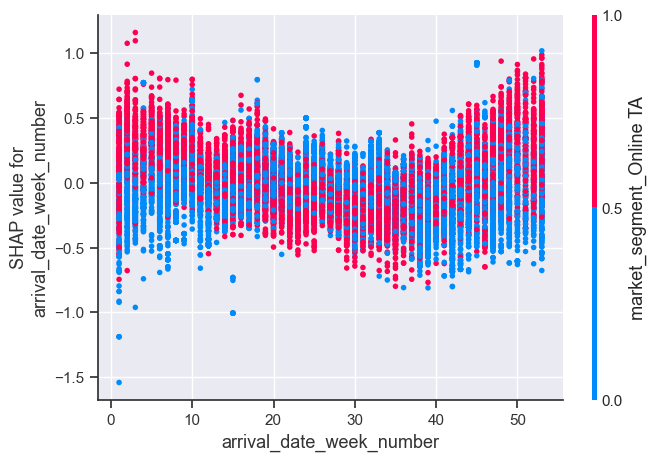

In [290]:
shap.dependence_plot('arrival_date_week_number', shap_values, X_test)

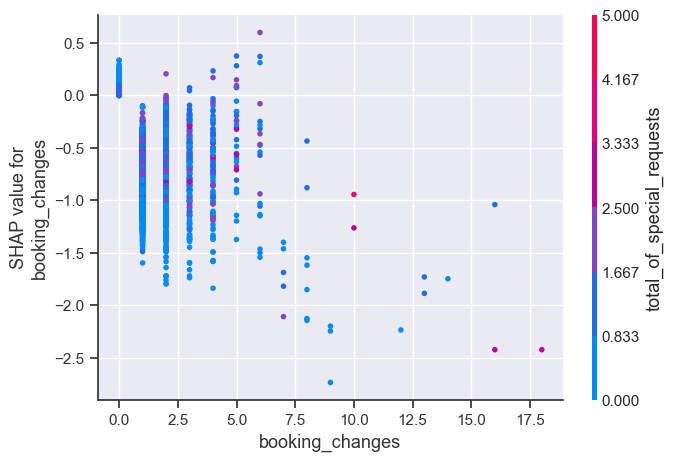

In [292]:
shap.dependence_plot('booking_changes', shap_values, X_test)

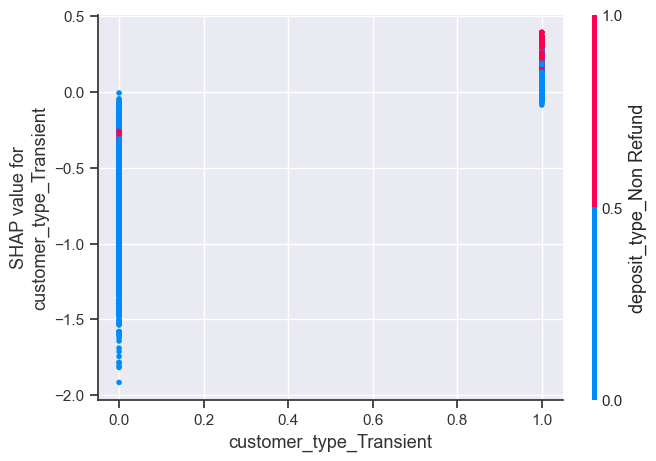

In [291]:
shap.dependence_plot('customer_type_Transient', shap_values, X_test)

# Validation


====CLASSIFICATION REPORT====
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      2234
           1       0.79      0.79      0.79      1322

    accuracy                           0.85      3556
   macro avg       0.84      0.84      0.84      3556
weighted avg       0.85      0.85      0.85      3556


====CONFUSION MATRIX====


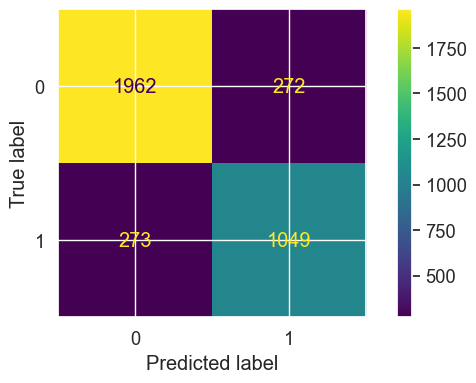

In [227]:
val_pred = best_xgb.predict(X_val)

print("\n====CLASSIFICATION REPORT====")
print(classification_report(y_val,val_pred))
print("\n====CONFUSION MATRIX====")
ConfusionMatrixDisplay(confusion_matrix(y_val,val_pred)).plot()

The model performed similarly well on the validation set as well.

Overall, our tuned XGB Classifier predicts booking cancellations relatively well, with an accuracy score of 85% and Class-1 F-1 Score of 79% on the validation set. The model is also less complex than the Decision Tree and the Random Forest, our XGB has max_depth of 8, while others have 15 and 18 respecitevly.

# Exports

Here we turn our function into a pipeline and export it as a pickle file, we also export our model as a pickle file for easy use.

In [77]:
filename = 'clean_data.pkl'

with open('clean_data.pkl', 'wb') as f:
    pickle.dump(clean_data, f)
    
print(f"Model saved to {filename}")

Model saved to clean_data.pkl


In [76]:
filename = 'best_xgb_model.pkl'

with open(filename, 'wb') as f:
    pickle.dump(best_xgb, f)

print(f"Model saved to {filename}")

Model saved to best_xgb_model.pkl
